<a href="https://colab.research.google.com/github/Chandrahas12/Machine-learning-Project/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = "drive/My Drive/datasetML"

import os
os.chdir(root_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "bank-additional.zip"

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [ ]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

# Data Visuvalization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

In [ ]:
#read data
data = pd.read_csv("/content/drive/My Drive/datasetML/bank-additional/bank-additional-full.csv",sep = ';')
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# data statistics
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data['y'].value_counts(normalize=True)

,proportion
y,
no,0.887346
yes,0.112654


In [ ]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [ ]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Text(0.5, 0, 'Target class')

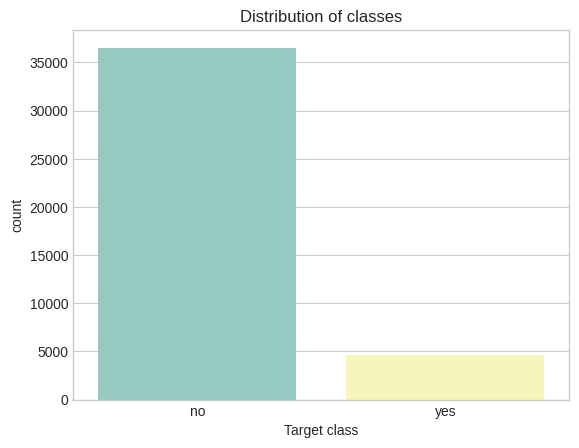

In [ ]:
from matplotlib import pyplot as plt
sns.countplot(x=data['y'], palette="Set3")
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [ ]:
data.pdays.describe()

,pdays
count,41188.000000
mean,962.475454
std,186.910907
min,0.000000
25%,999.000000
50%,999.000000
75%,999.000000
max,999.000000


In [ ]:
data.drop(columns=['pdays'],inplace = True)

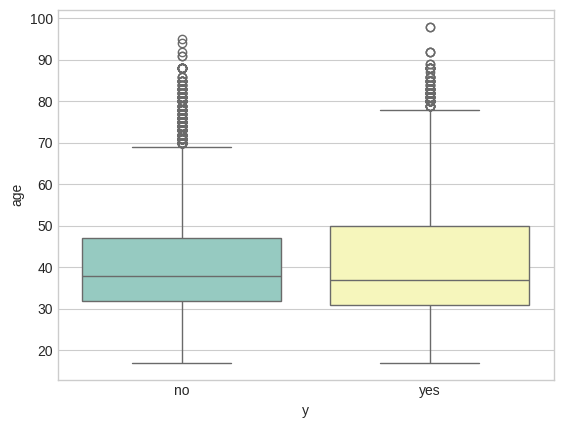

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age", palette="Set3")
plt.show()

Text(0.5, 1.0, 'PDF of age for target variable y')

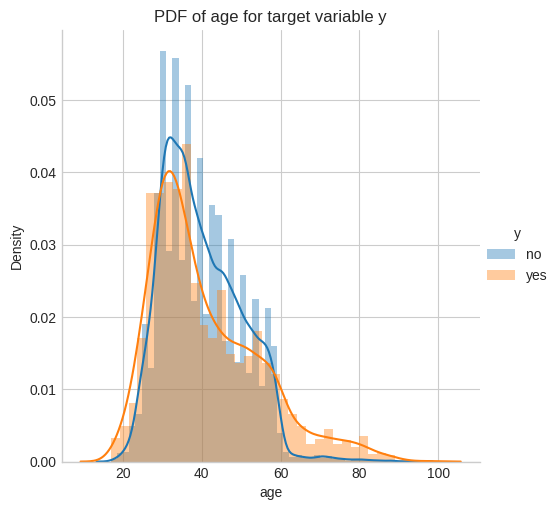

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

<Axes: >

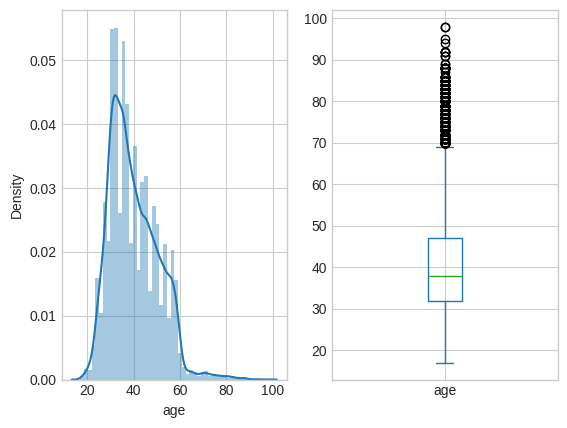

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age'])
plt.subplot(122)
data['age'].plot.box()

In [ ]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 58.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 59.0
98% of people having age are less than equal to 62.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 98.0
IQR 15.0


In [ ]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

<Axes: xlabel='age_group', ylabel='count'>

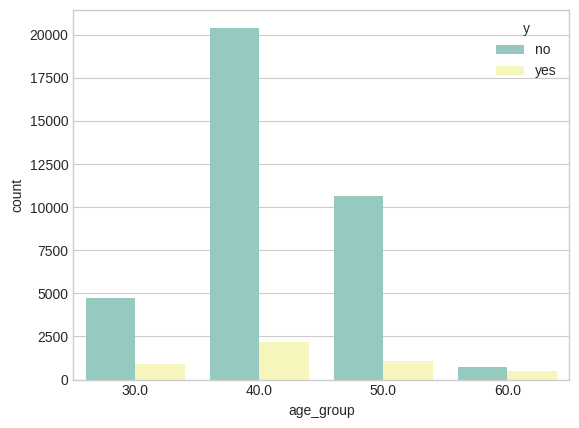

In [ ]:
sns.countplot(x='age_group', data=data, hue='y', palette="Set3")

In [ ]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5669, Success rate: 0.1626389133886047
Clients of age 30-45 contacted: 22585, Success rate: 0.0959929156519814
Clients of age 40-60 contacted: 11741, Success rate: 0.09181500723958777
Clients of 60+ age contacted: 1193, Success rate: 0.3956412405699916


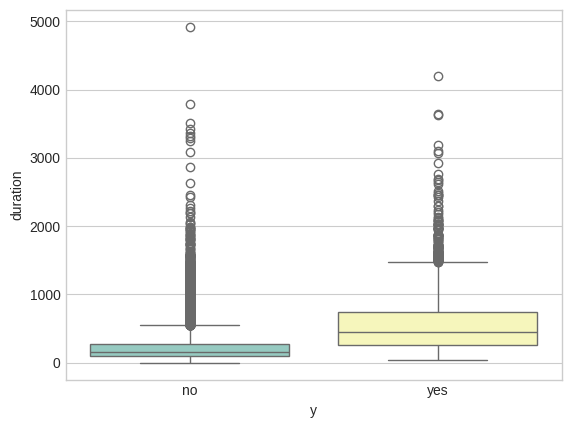

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration", palette="Set3")
plt.show()

Text(0.5, 1.0, 'PDF of duration for target variable y')

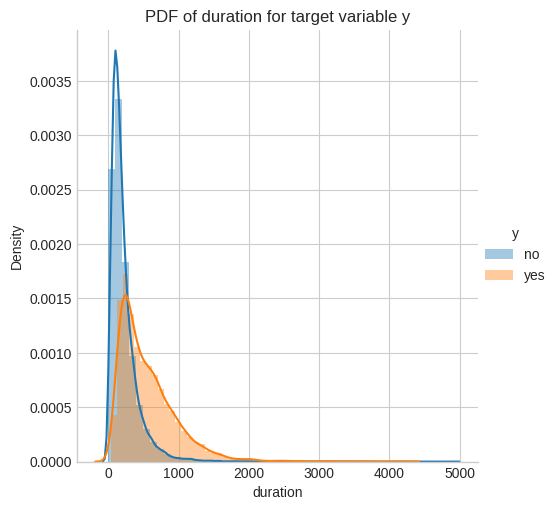

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

<Axes: >

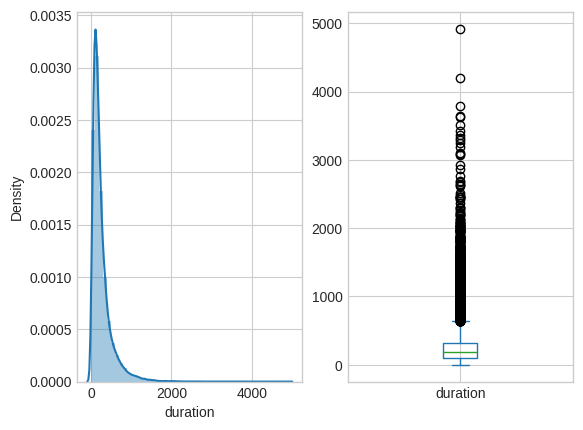

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['duration'])
plt.subplot(122)
data['duration'].plot.box()

In [ ]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 752.6500000000015
96% of calls have duration less than equal to 820.5199999999968
97% of calls have duration less than equal to 911.0
98% of calls have duration less than equal to 1052.260000000002
99% of calls have duration less than equal to 1271.1299999999974
100% of calls have duration less than equal to 4918.0
IQR 217.0


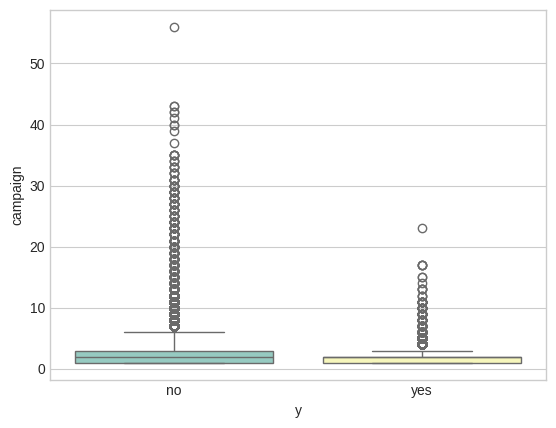

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign", palette="Set3")
plt.show()

<Axes: >

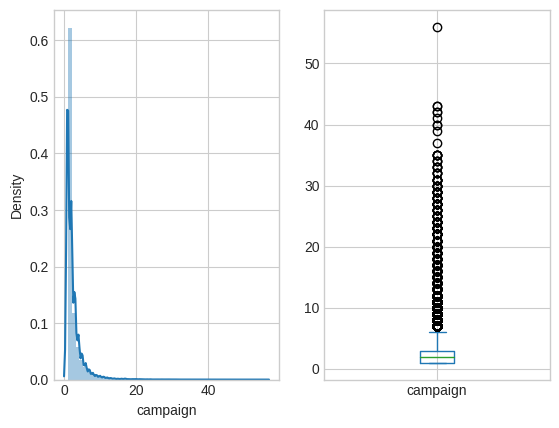

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['campaign'])
plt.subplot(122)
data['campaign'].plot.box()

Text(0.5, 1.0, 'PDF of campaign for target variable y')

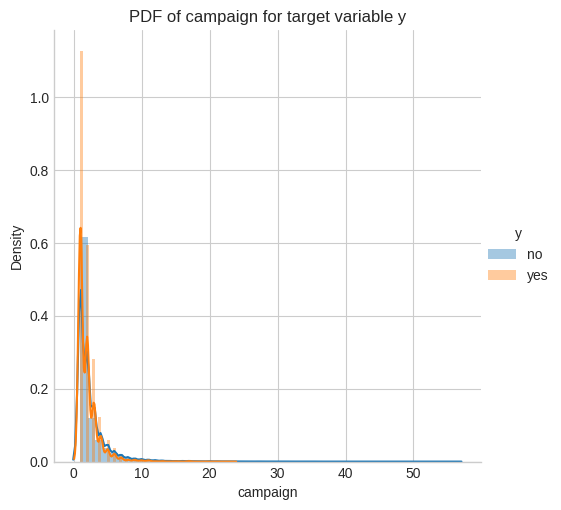

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'campaign') \
.add_legend()
plt.title('PDF of campaign for target variable y')

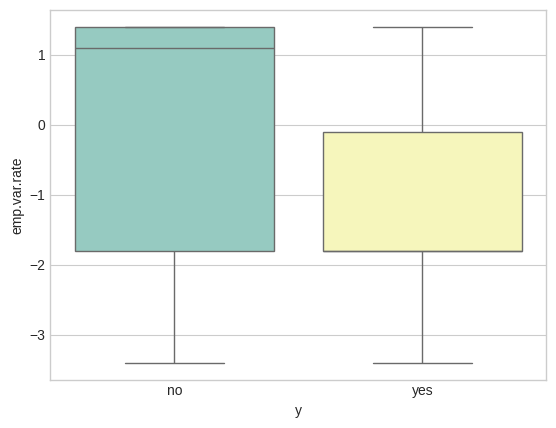

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate", palette="Set3")
plt.show()

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

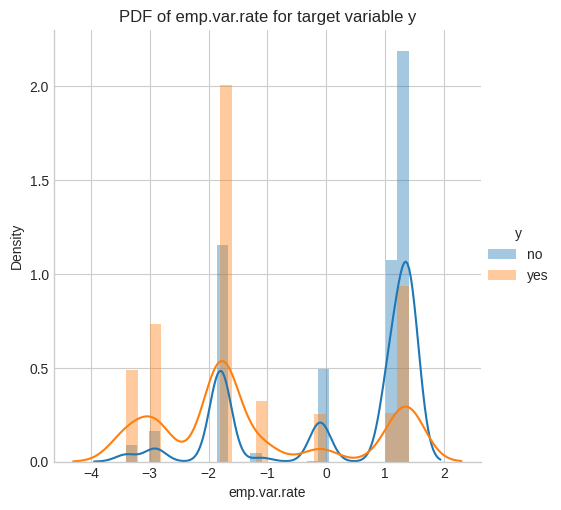

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'emp.var.rate') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

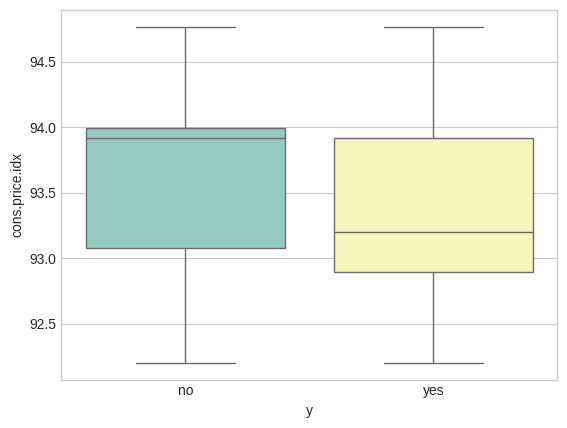

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx", palette="Set3")
plt.show()

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

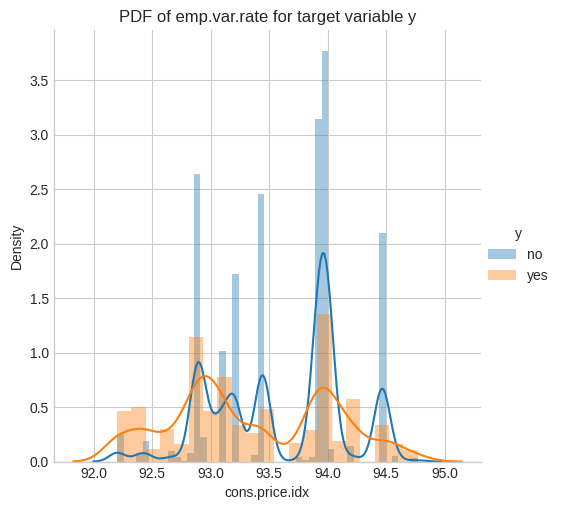

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'cons.price.idx') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

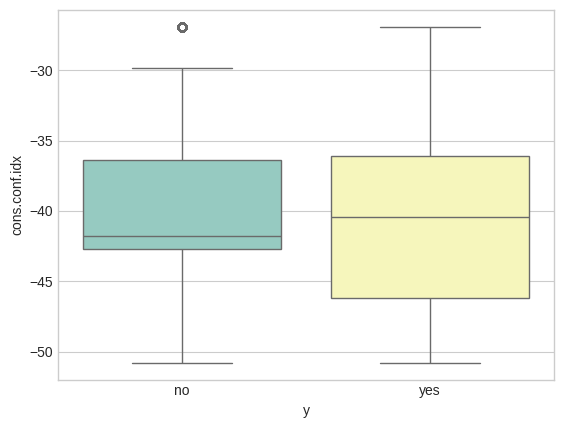

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.conf.idx", palette="Set3")
plt.show()

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

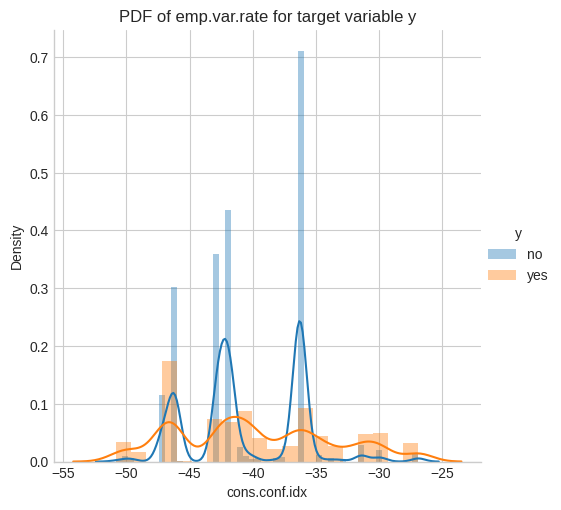

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'cons.conf.idx') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

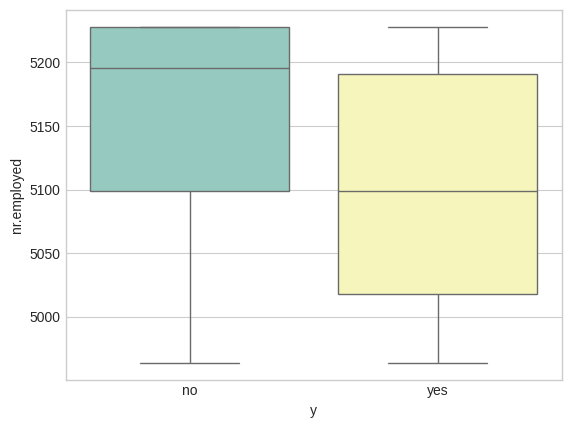

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="nr.employed", palette="Set3")
plt.show()

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

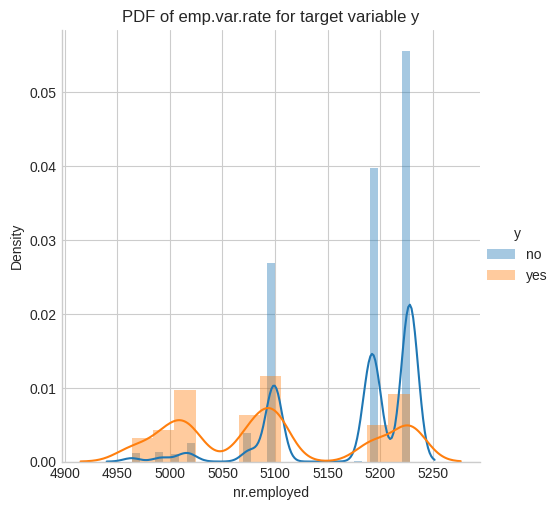

In [ ]:
sns.FacetGrid(data, hue='y', height=5) \
.map(sns.distplot, 'nr.employed') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

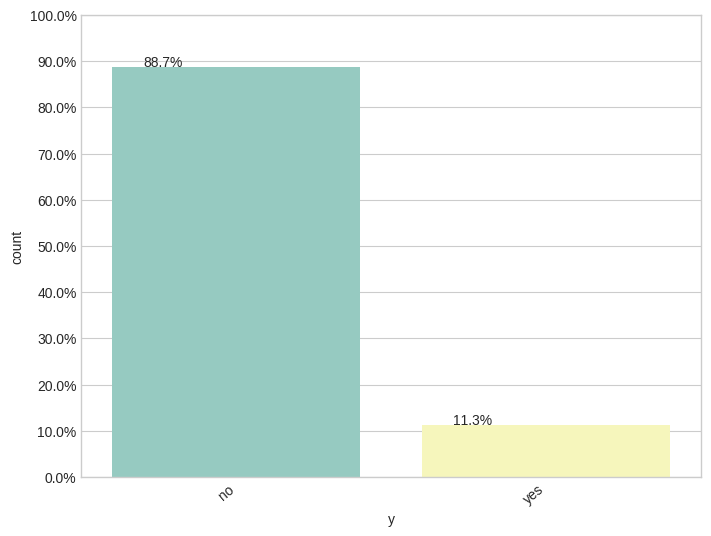

In [ ]:
plt.figure(figsize=(8,6))
Y = data['y']
total = len(Y)*1.
ax=sns.countplot(x="y", data=data, palette="Set3")
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

<Axes: xlabel='marital'>

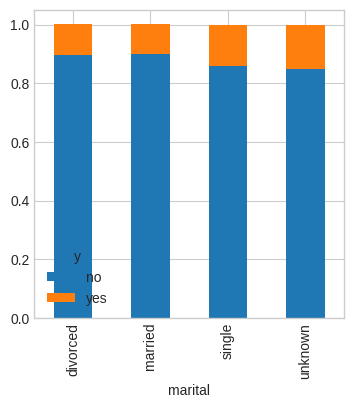

In [ ]:
Marriage=pd.crosstab(data["marital"],data['y'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='education'>

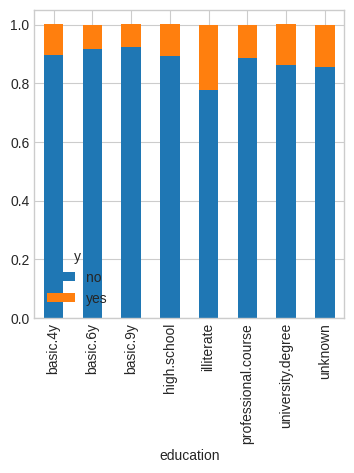

In [ ]:
Education=pd.crosstab(data["education"],data['y'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='housing'>

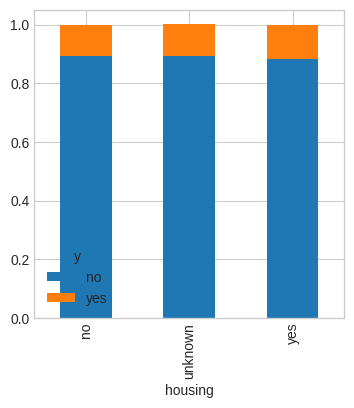

In [ ]:
House=pd.crosstab(data["housing"],data['y'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='loan'>

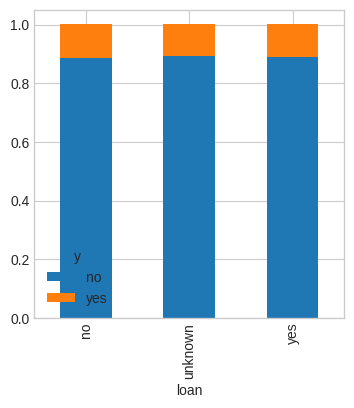

In [ ]:
Loan=pd.crosstab(data["loan"],data['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='contact'>

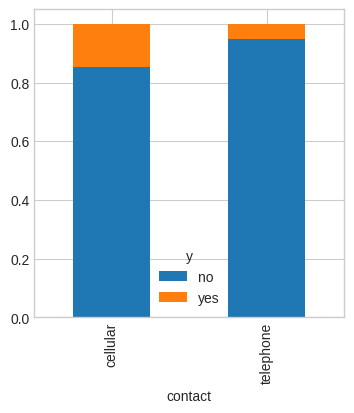

In [ ]:
Con=pd.crosstab(data["contact"],data['y'])
Con.div(Con.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='poutcome'>

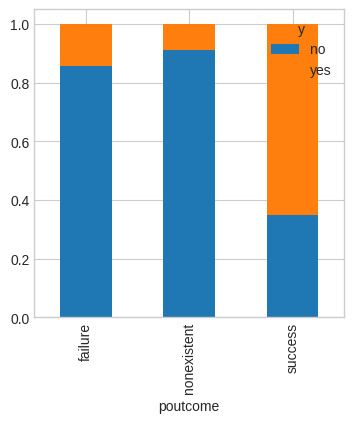

In [ ]:
POC=pd.crosstab(data["poutcome"],data['y'])
POC.div(POC.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='y'>

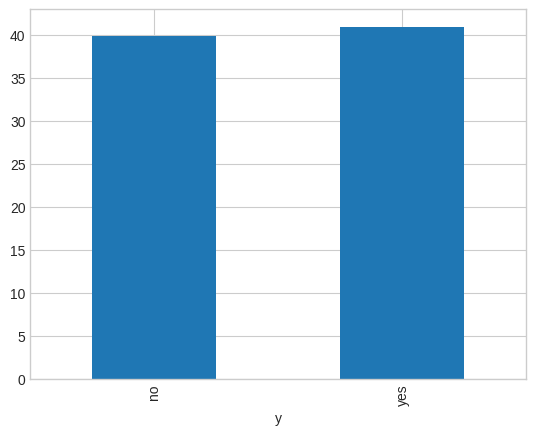

In [ ]:
data.groupby('y')['age'].mean().plot.bar()

<Axes: xlabel='y'>

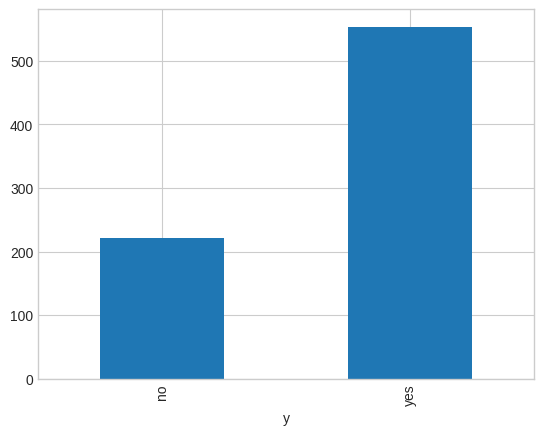

In [ ]:
data.groupby('y')['duration'].mean().plot.bar()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()


In [ ]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

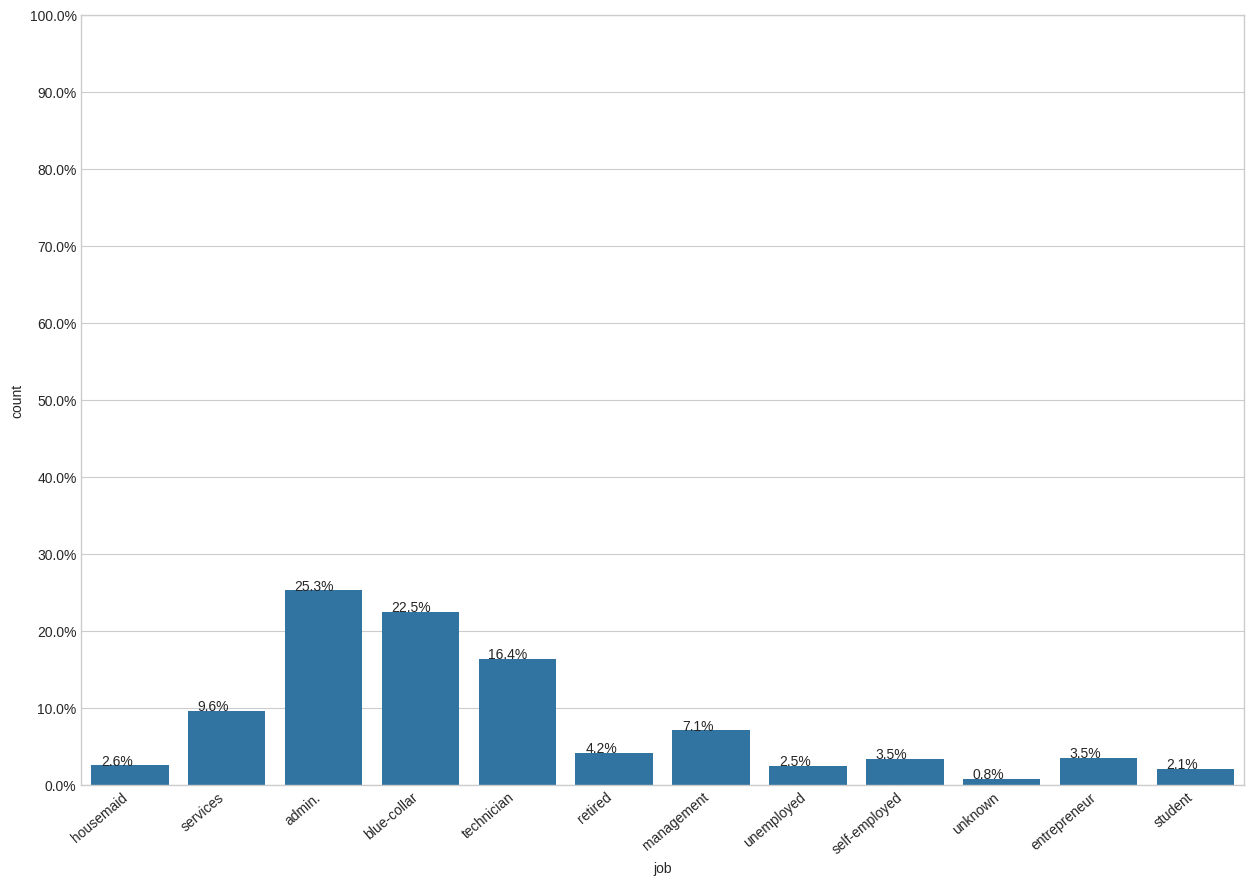

In [ ]:
countplot("job", data)

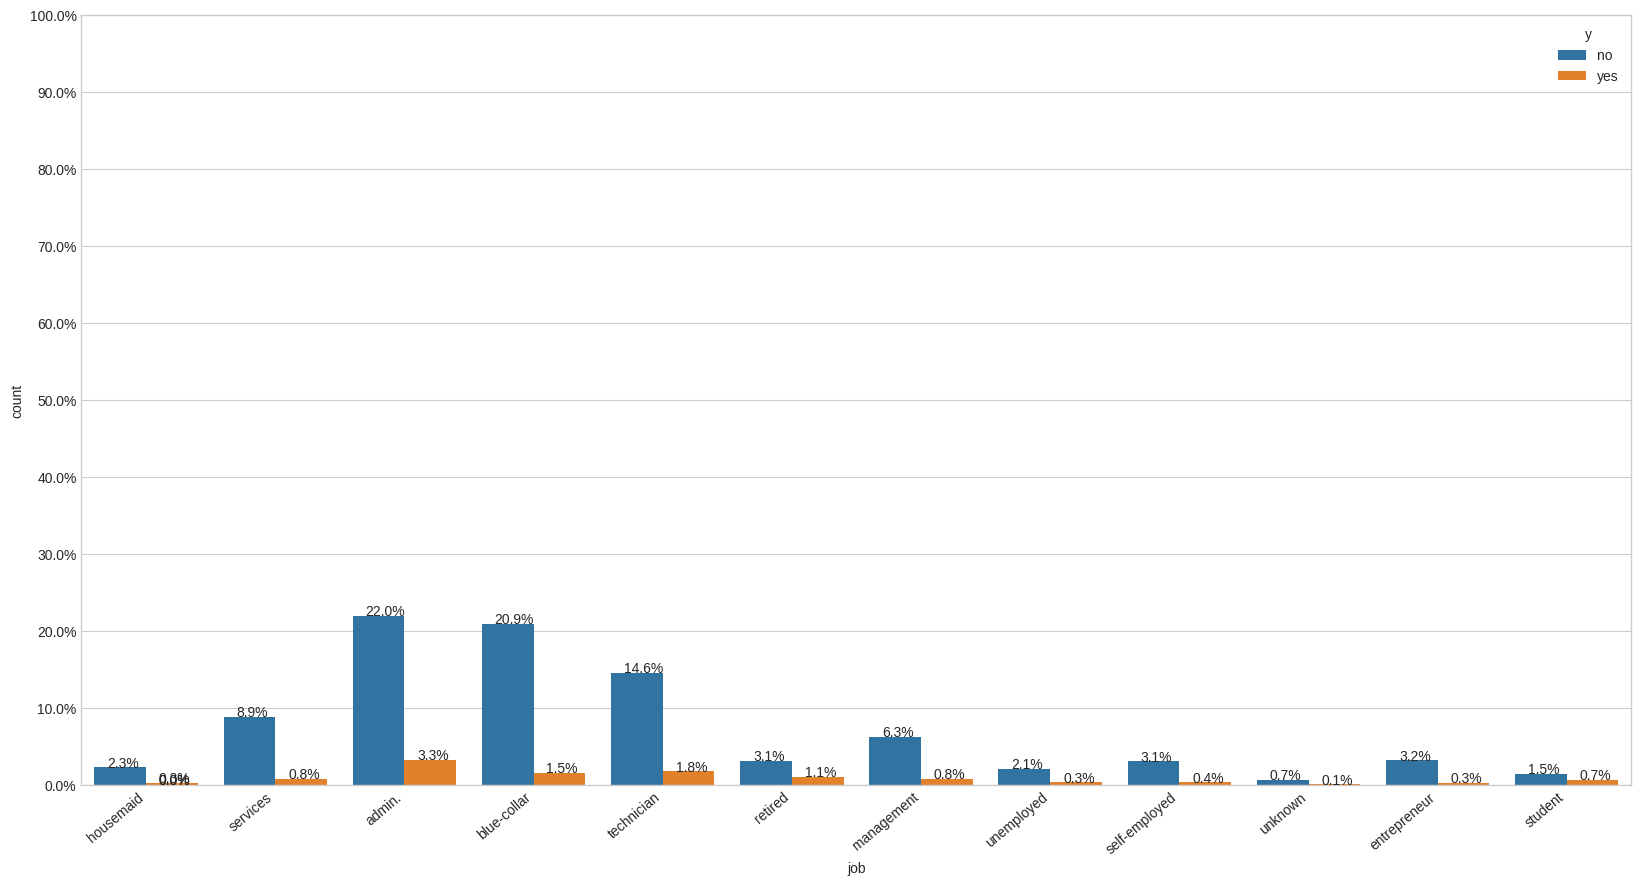

In [ ]:
countplot_withY("job", data)

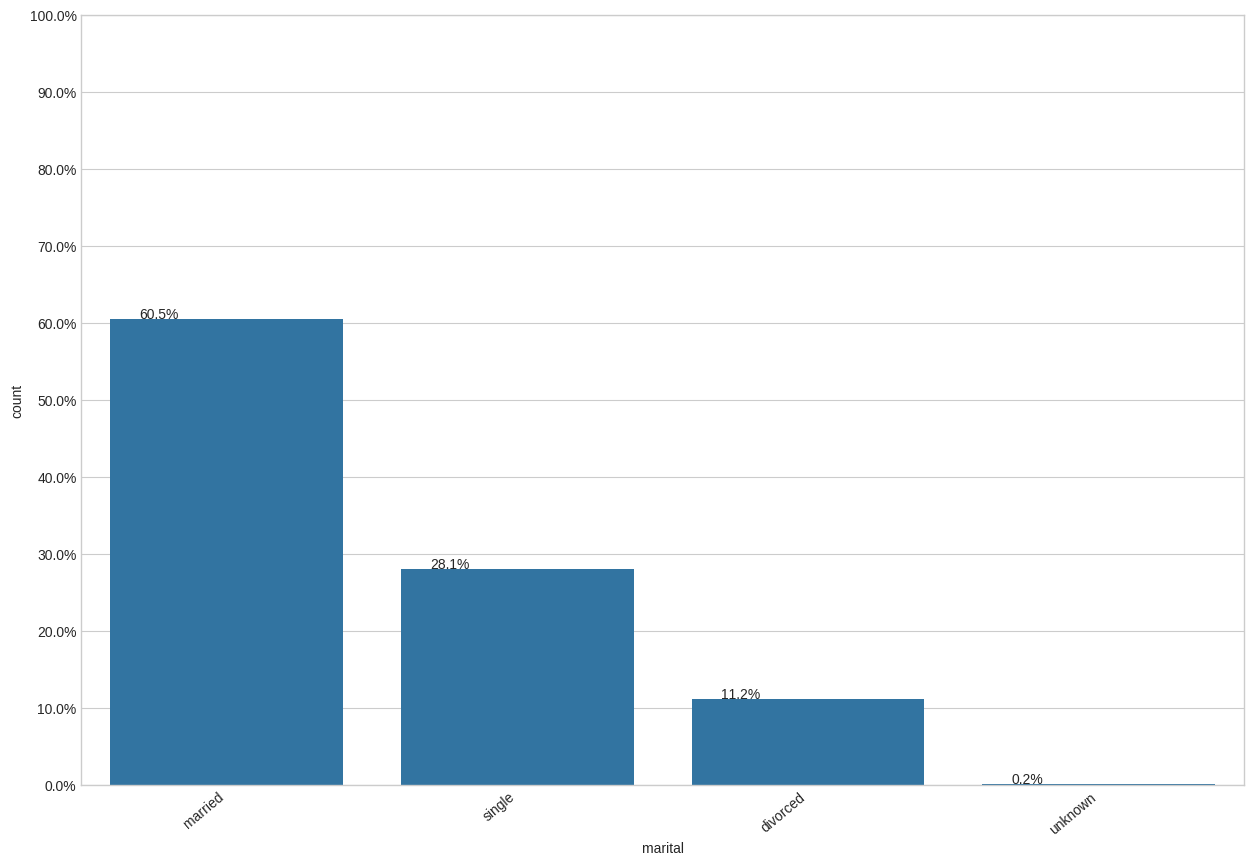

In [ ]:
countplot("marital", data)

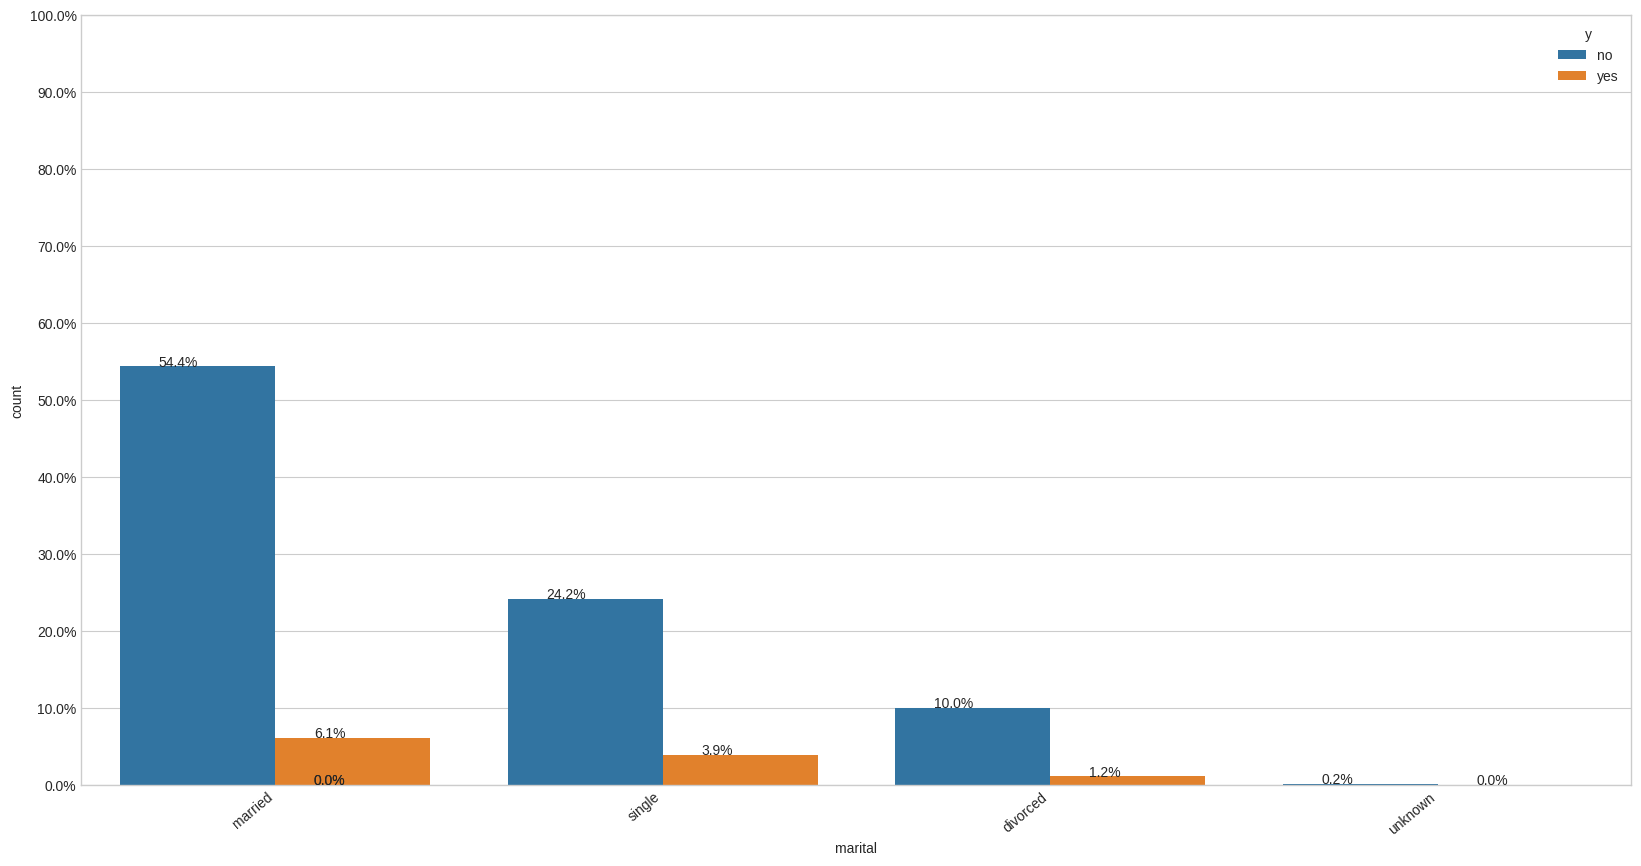

In [ ]:
countplot_withY("marital", data)

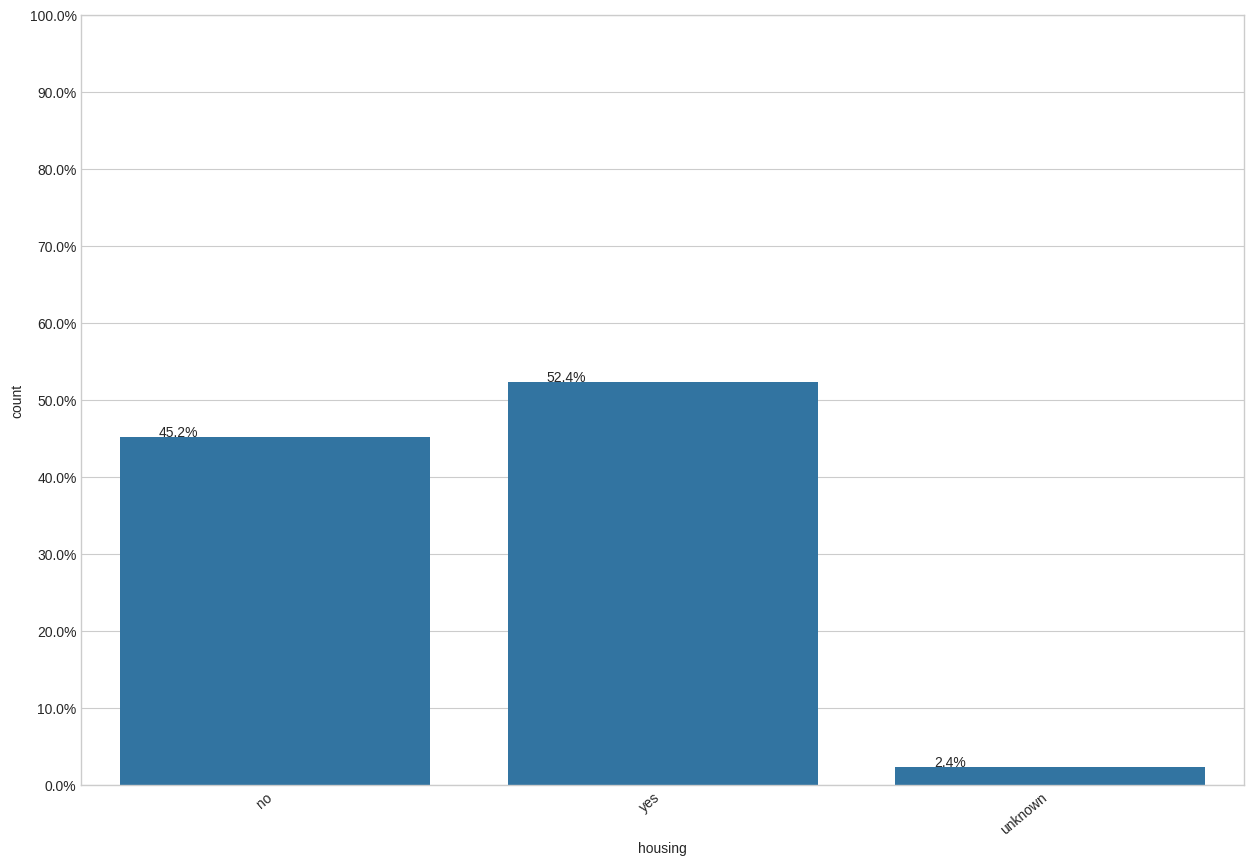

In [ ]:
countplot("housing", data)

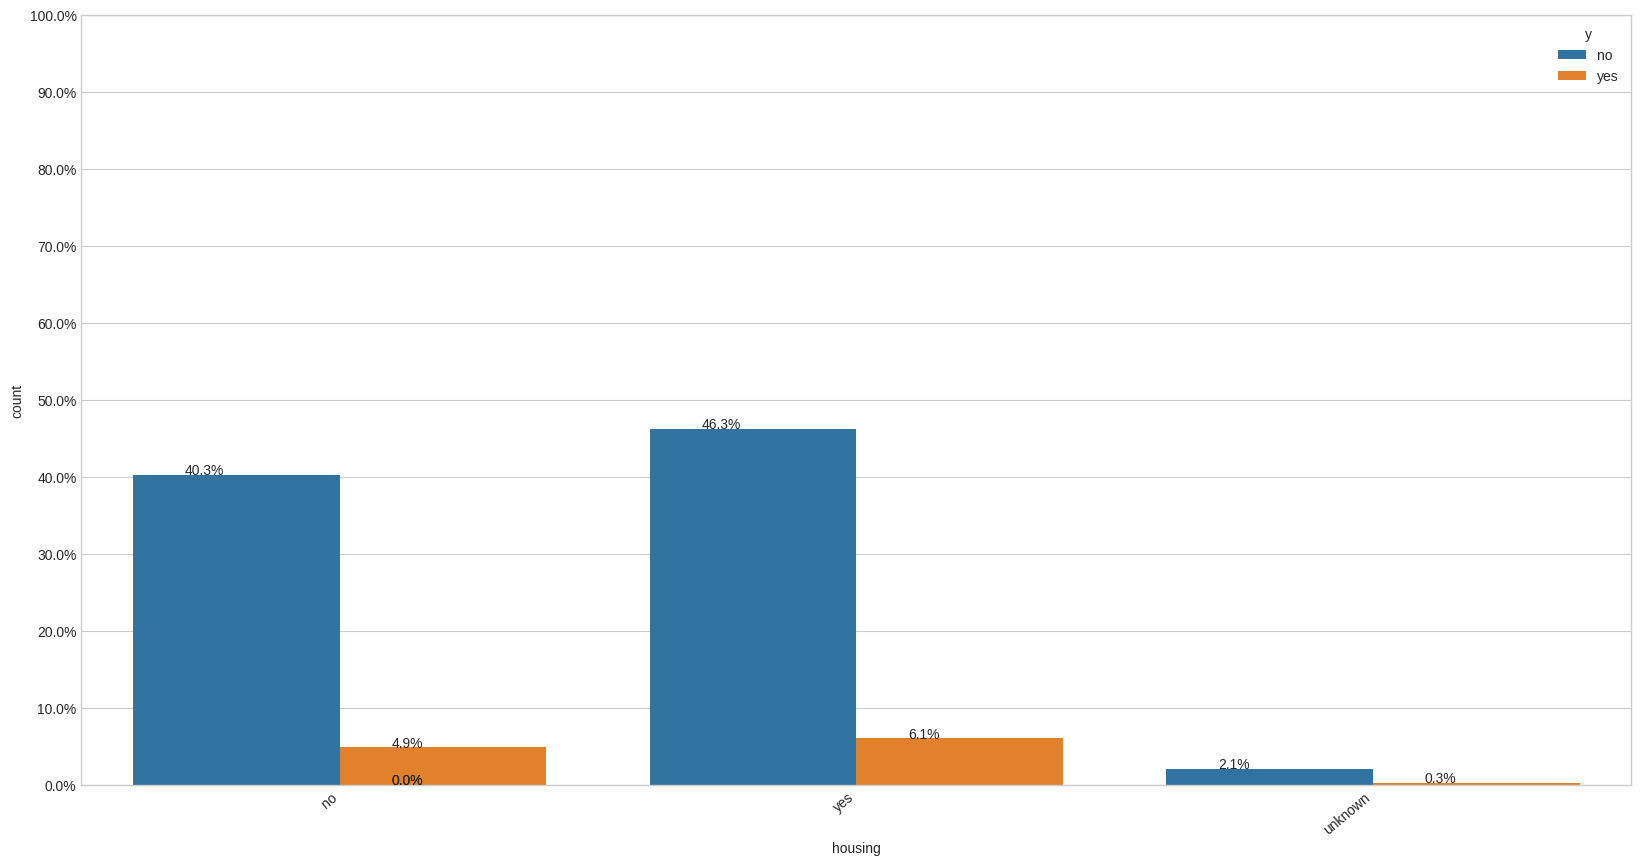

In [ ]:
countplot_withY("housing", data)

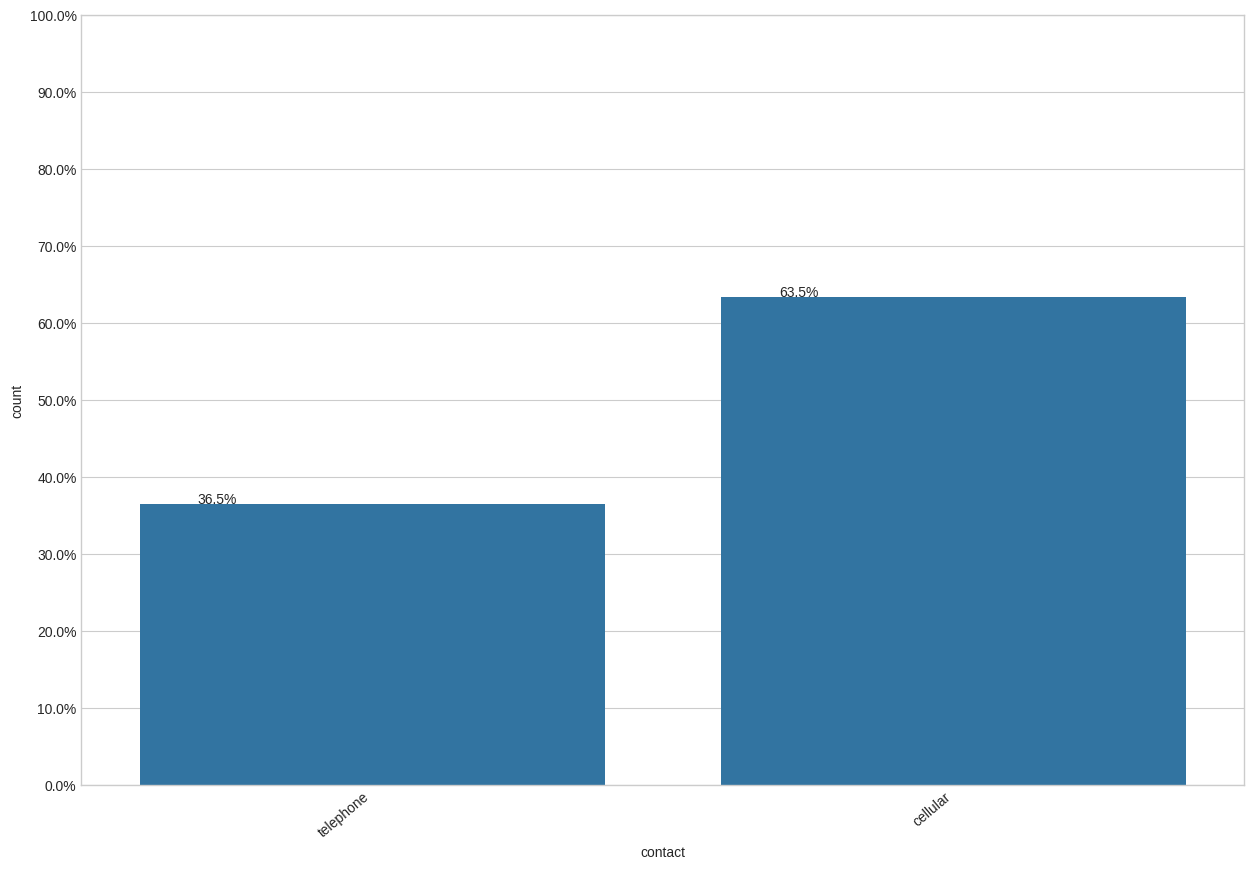

In [ ]:
countplot("contact", data)

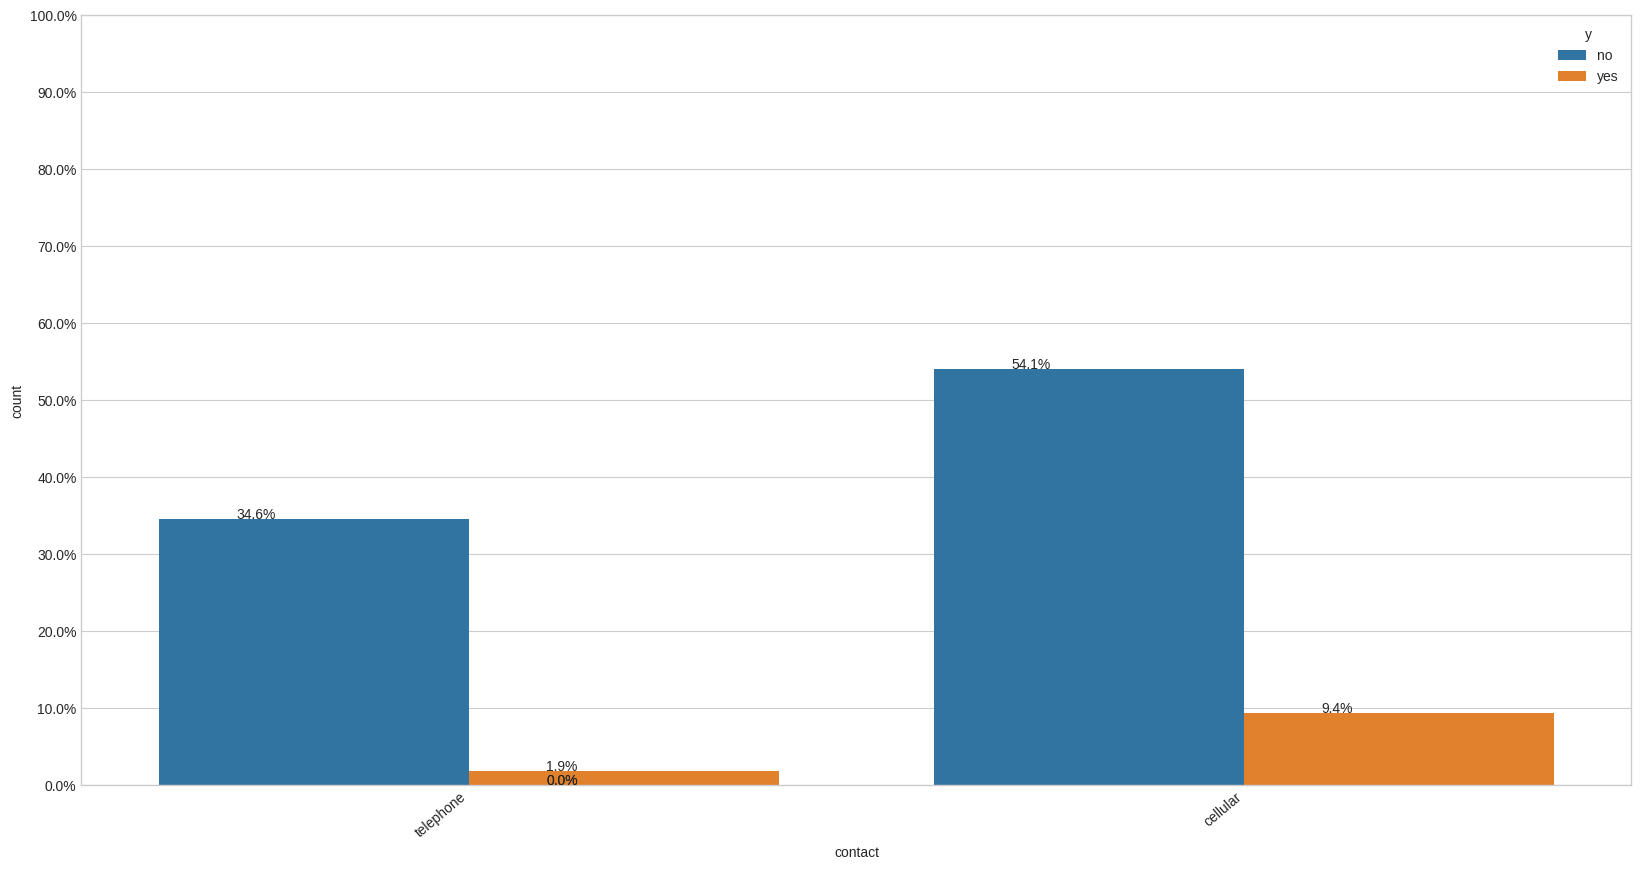

In [ ]:
countplot_withY("contact", data)

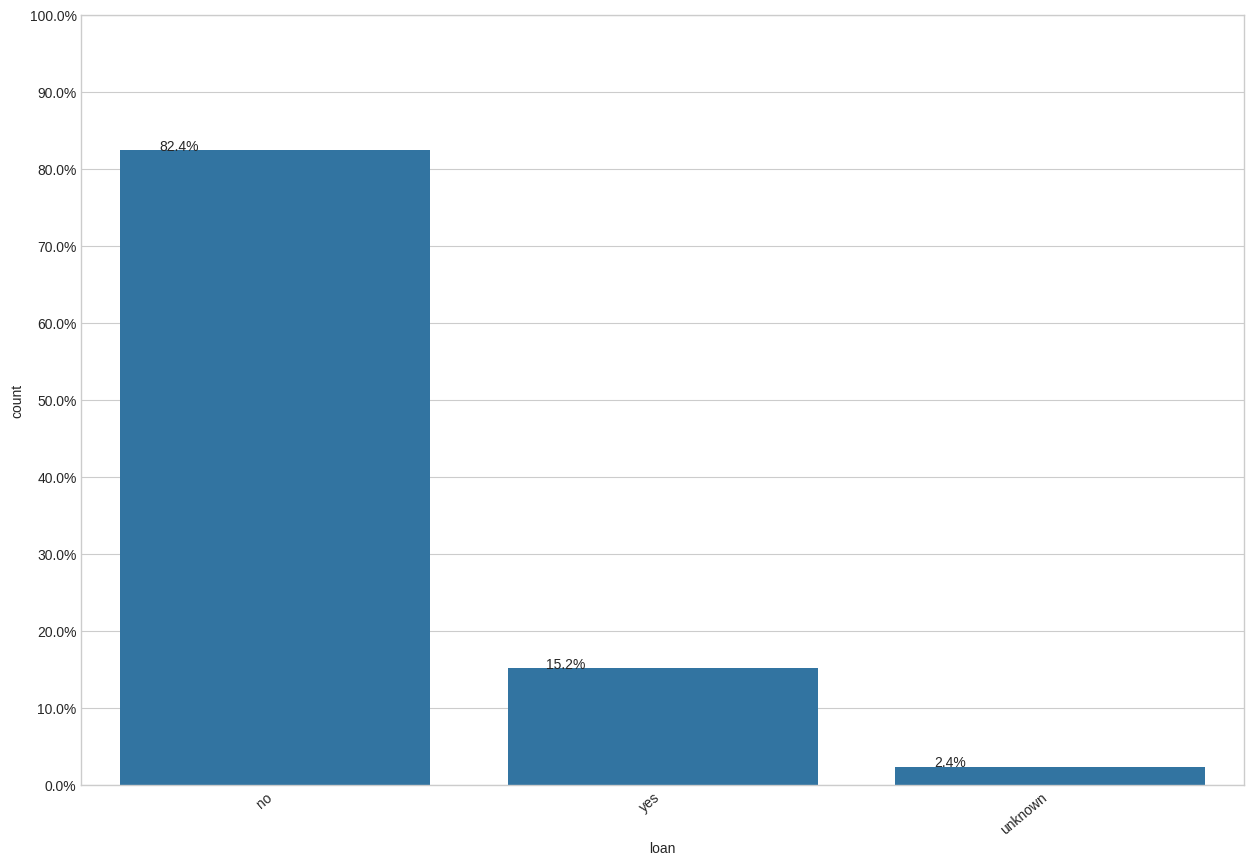

In [ ]:
countplot("loan", data)

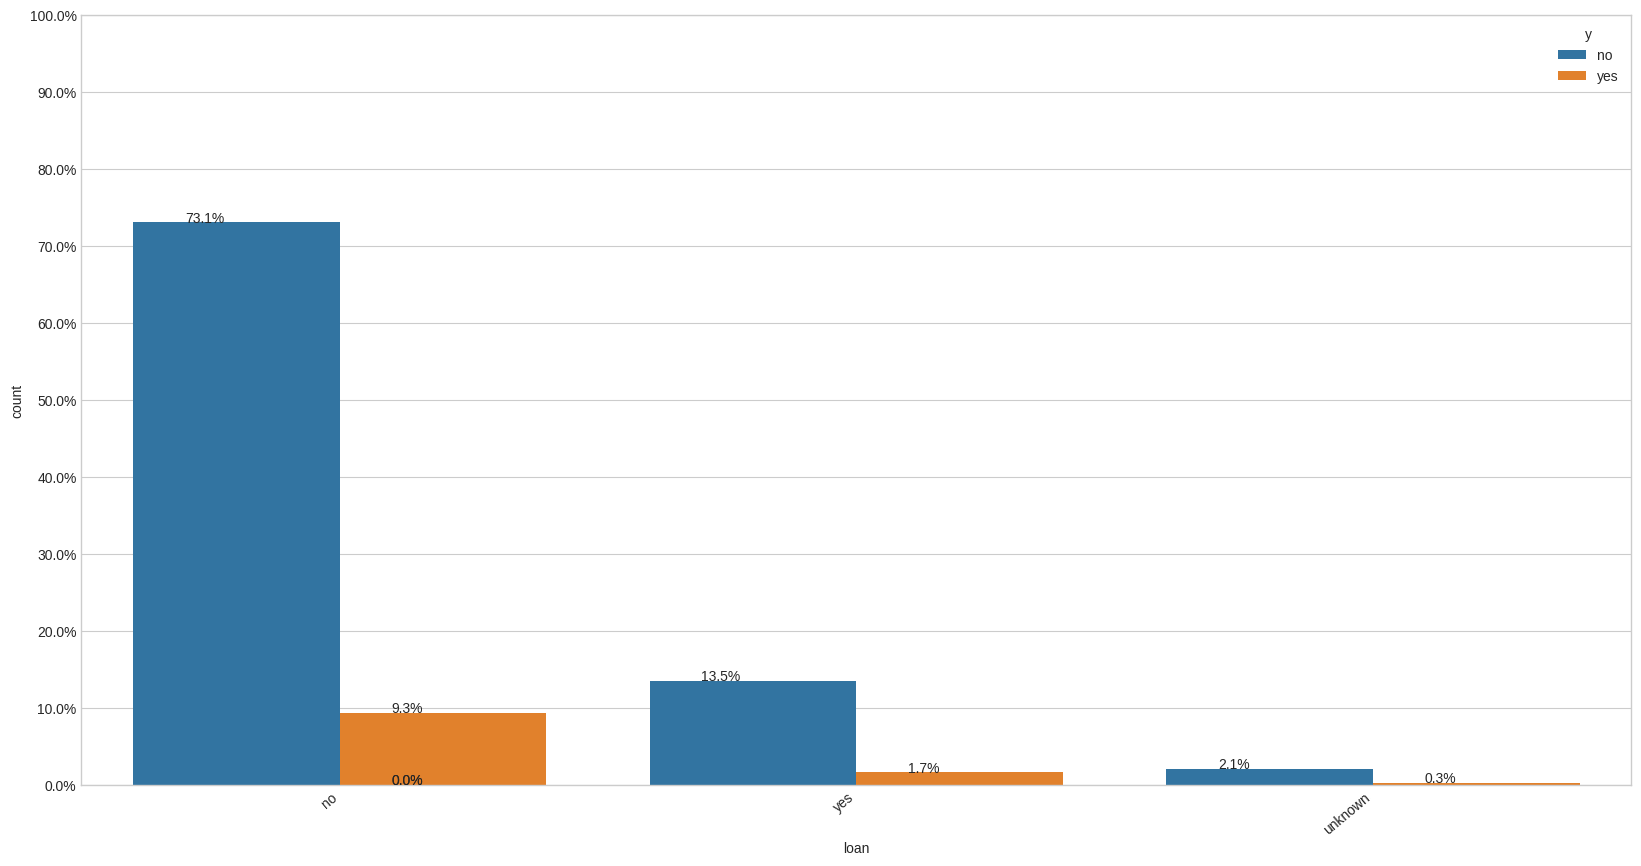

In [ ]:
countplot_withY("loan", data)

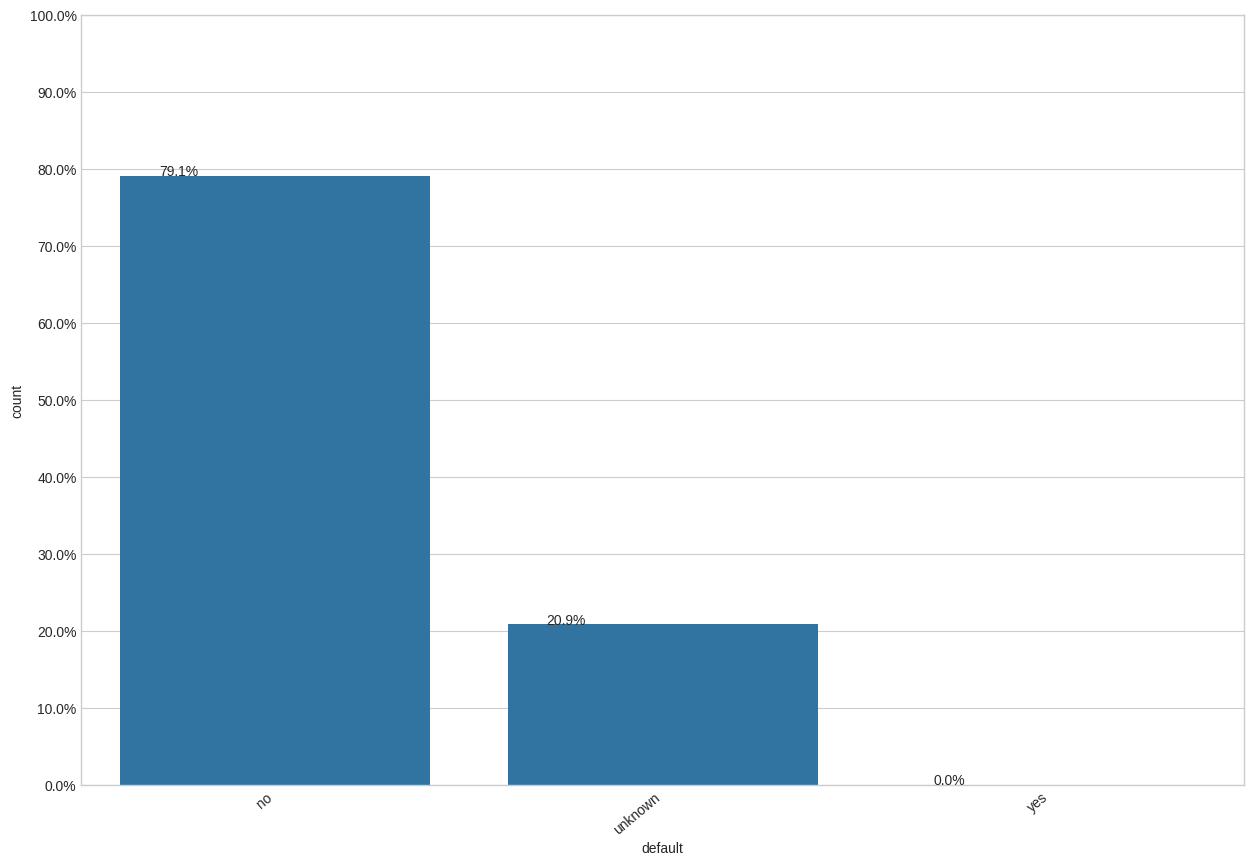

In [ ]:
countplot("default", data)

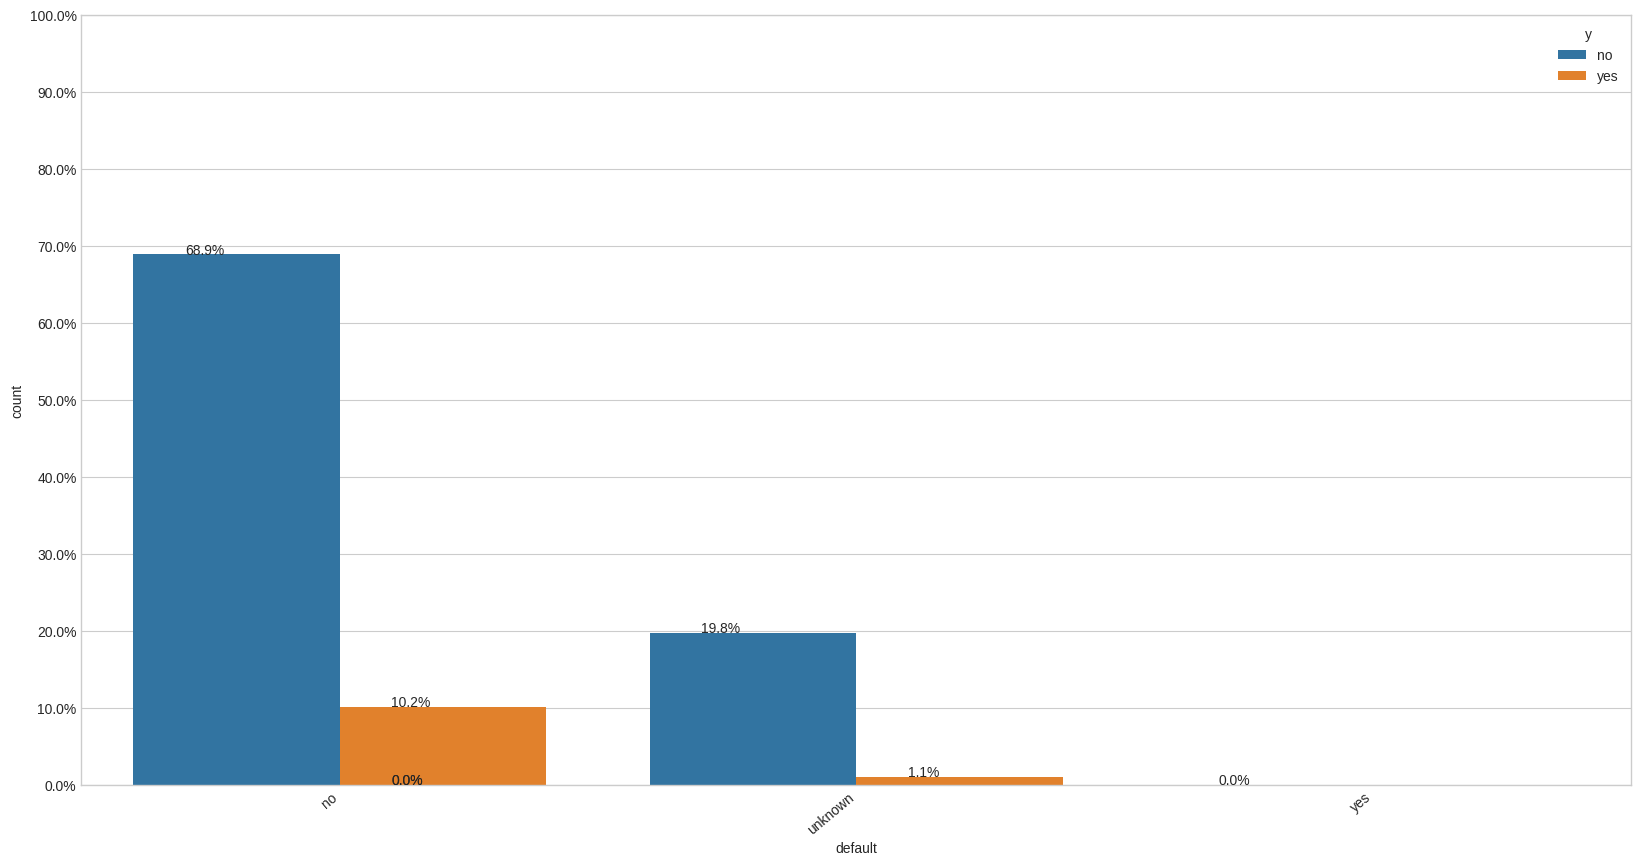

In [ ]:
countplot_withY("default", data)

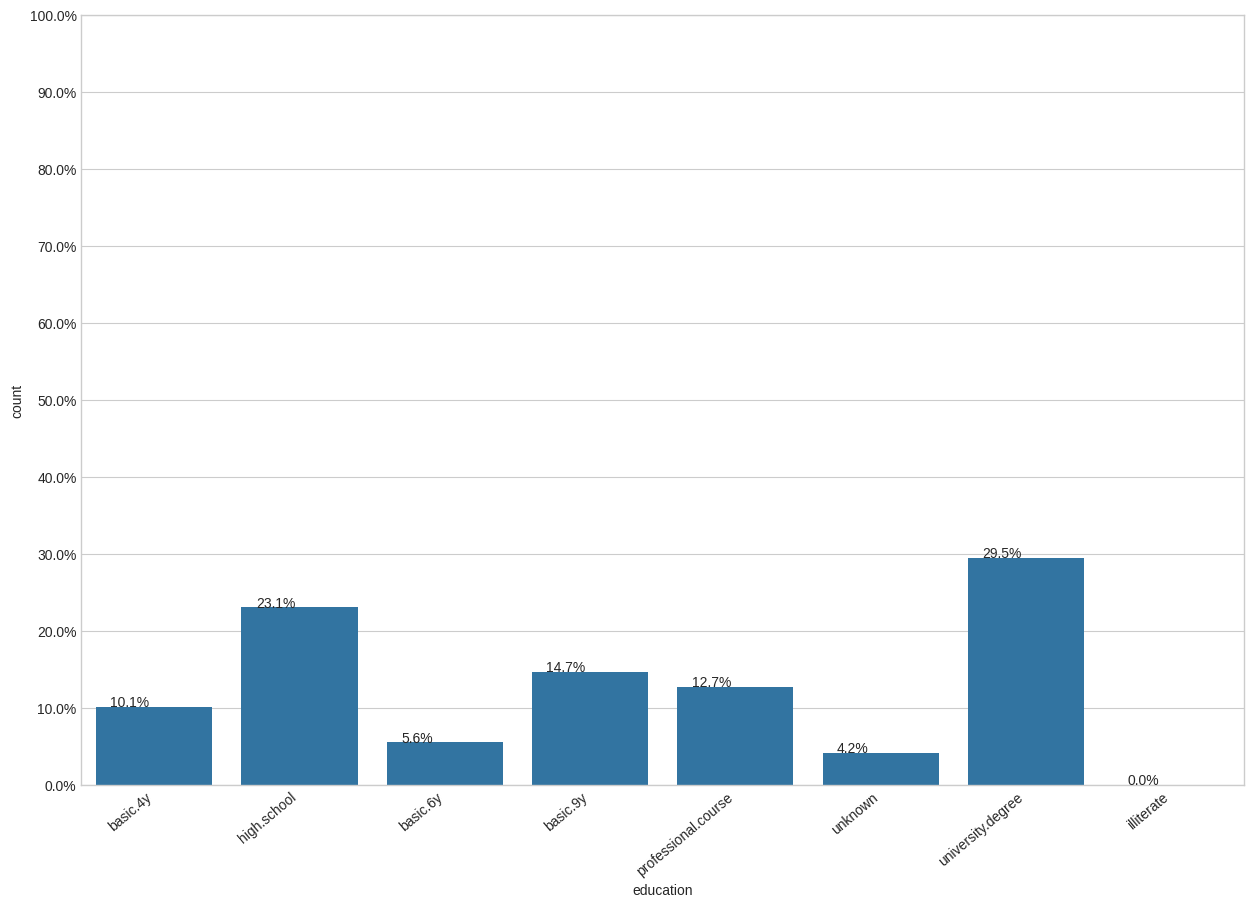

In [ ]:
countplot("education", data)

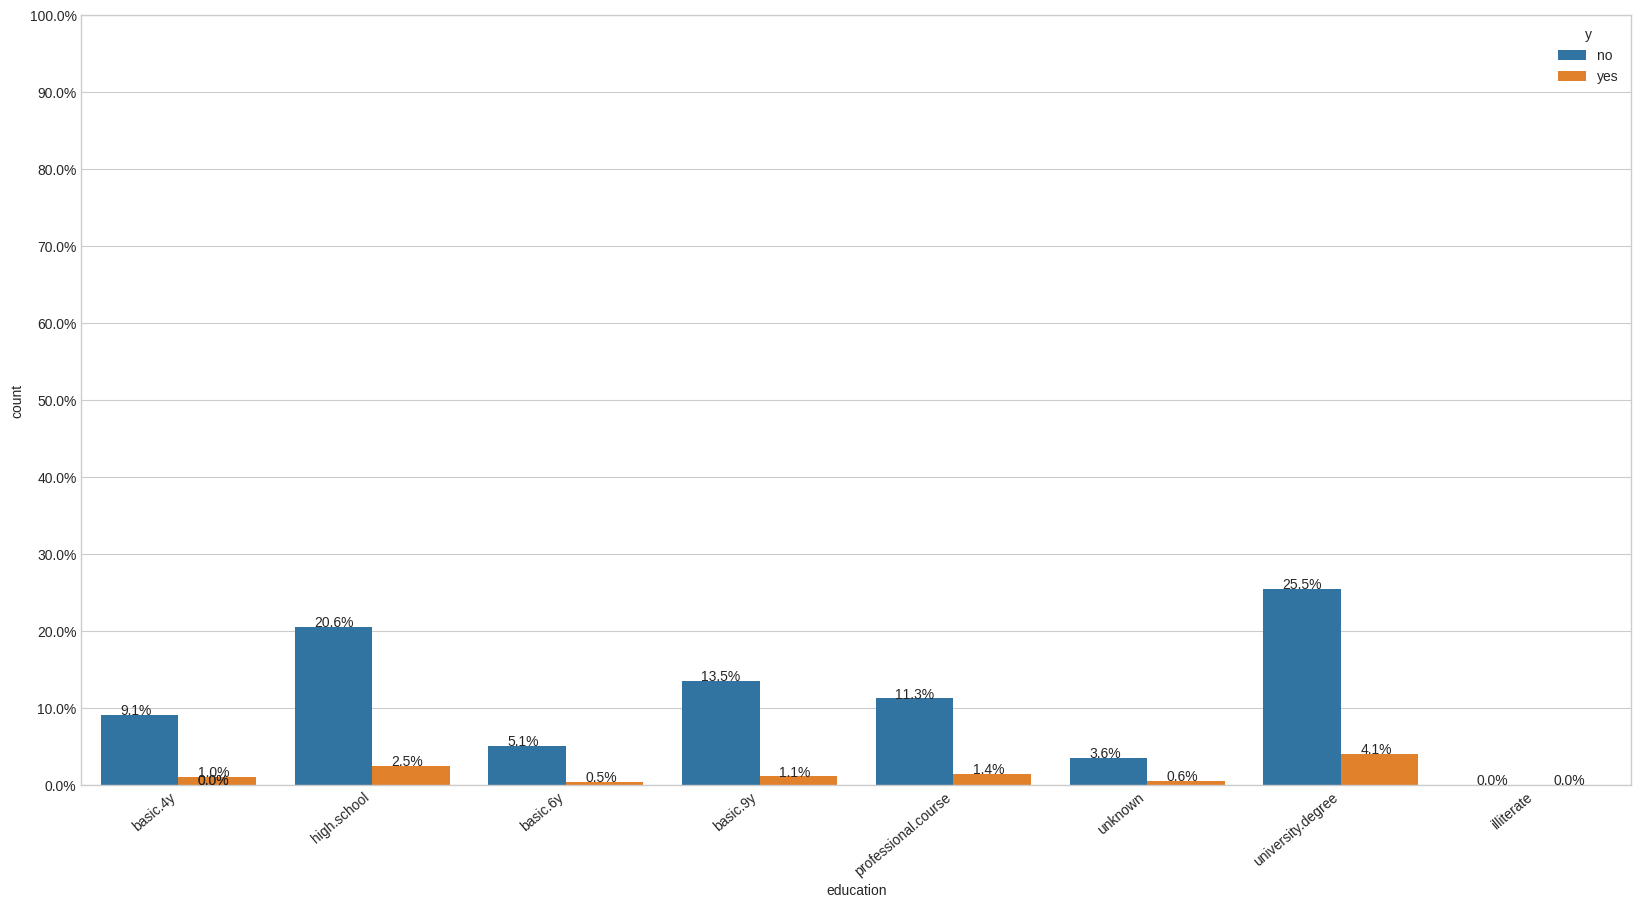

In [ ]:
countplot_withY("education", data)

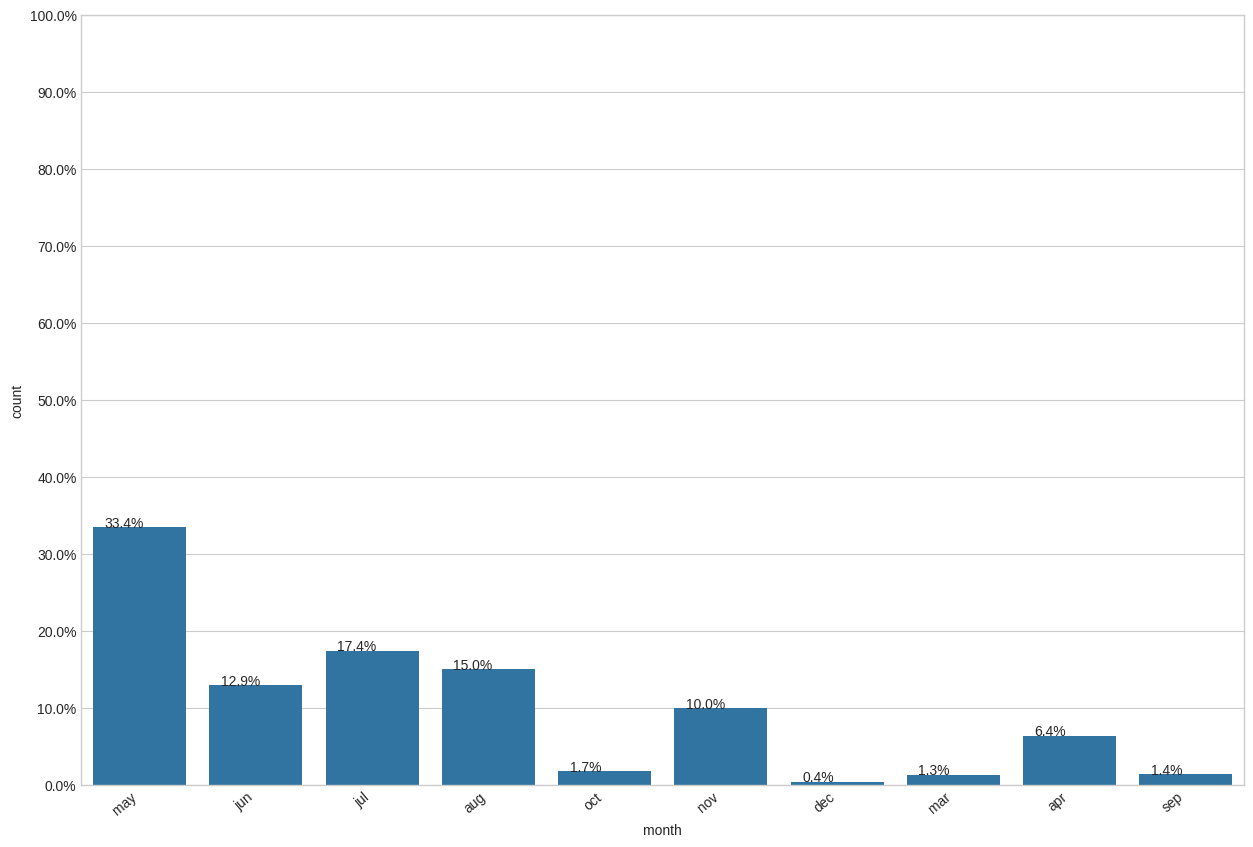

In [ ]:
countplot("month", data)

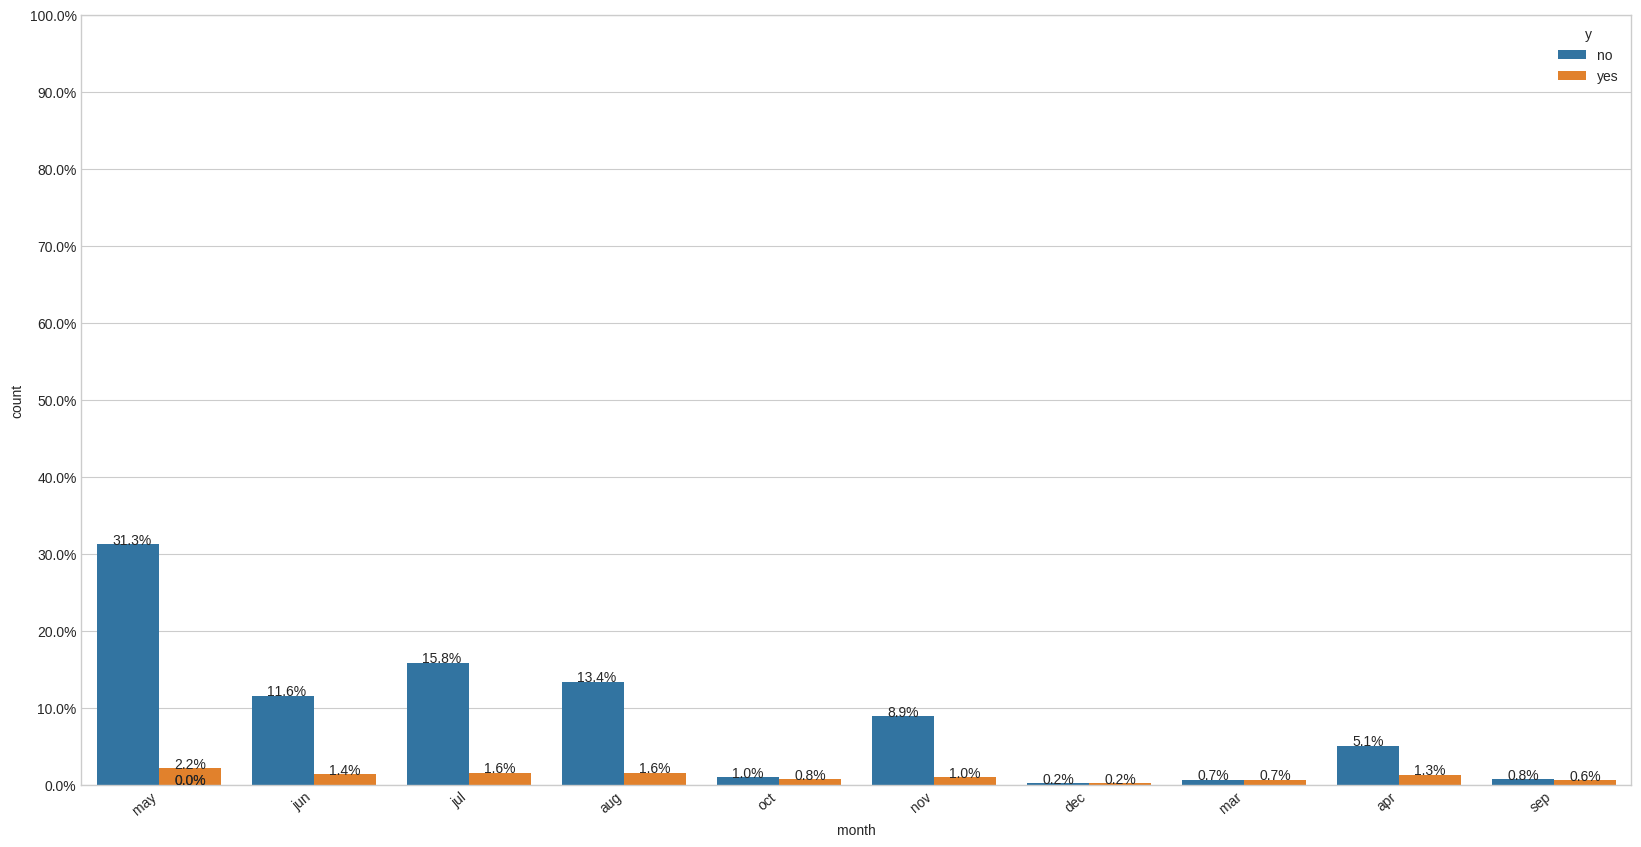

In [ ]:
countplot_withY("month", data)

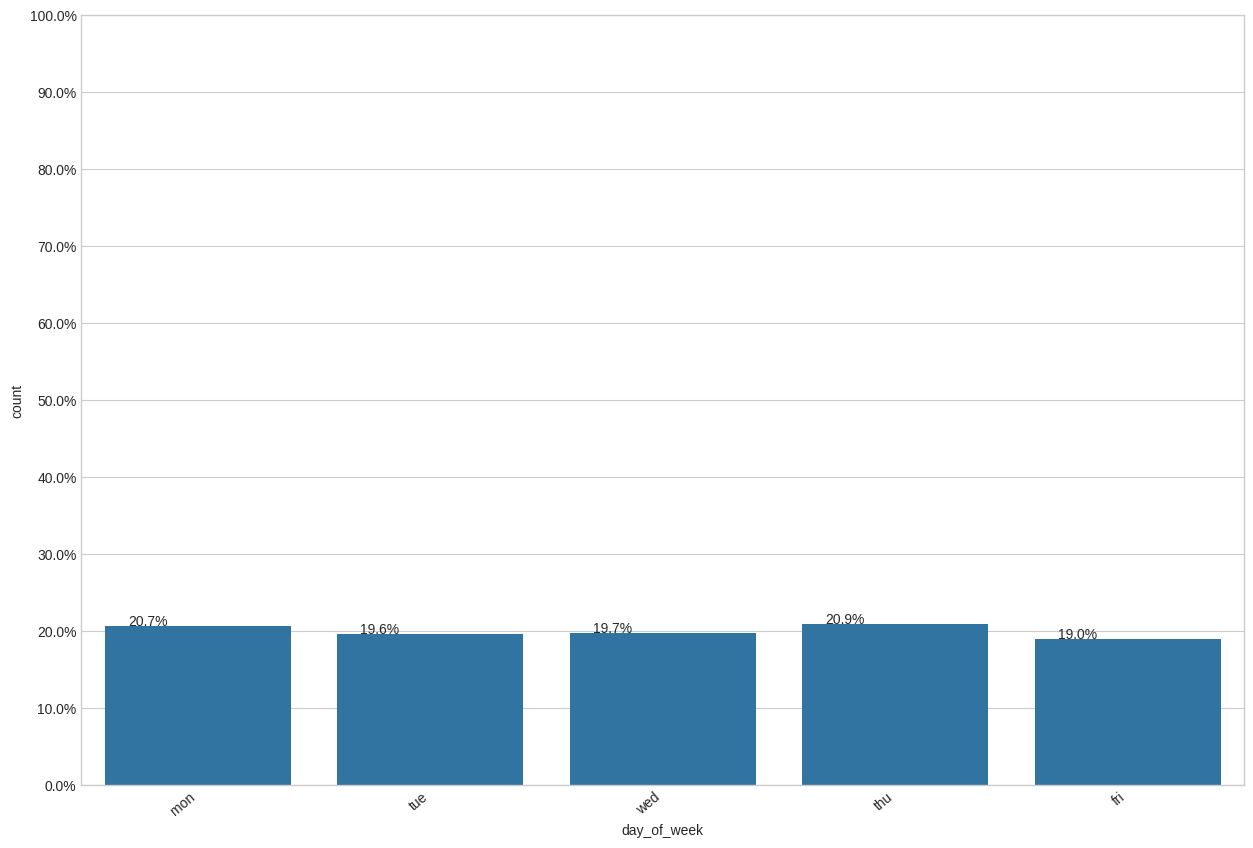

In [ ]:
countplot("day_of_week", data)

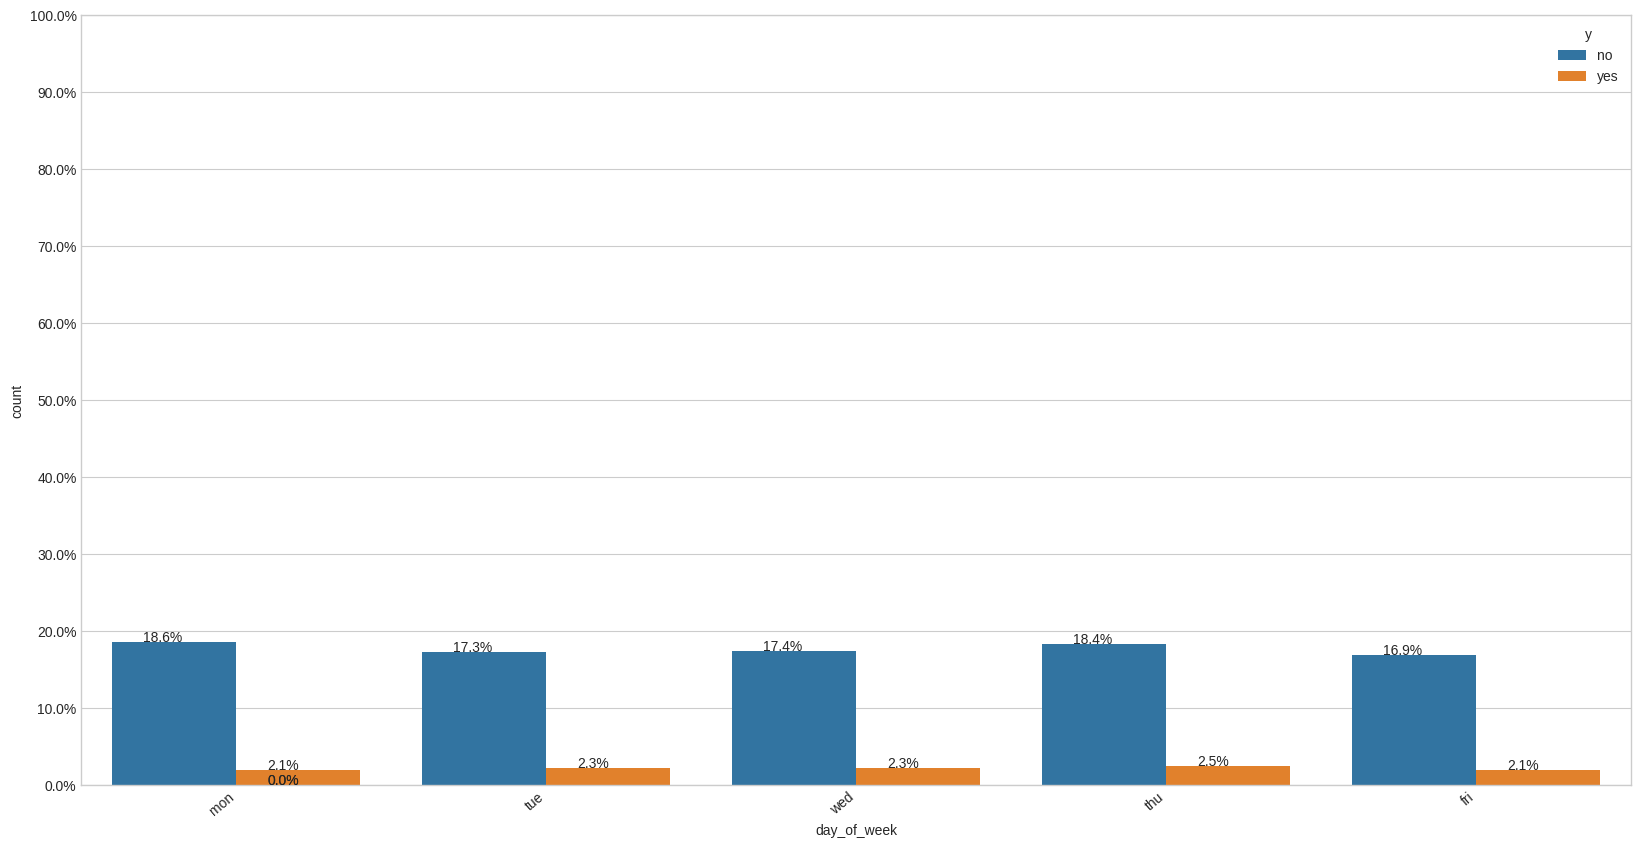

In [ ]:
countplot_withY("day_of_week", data)

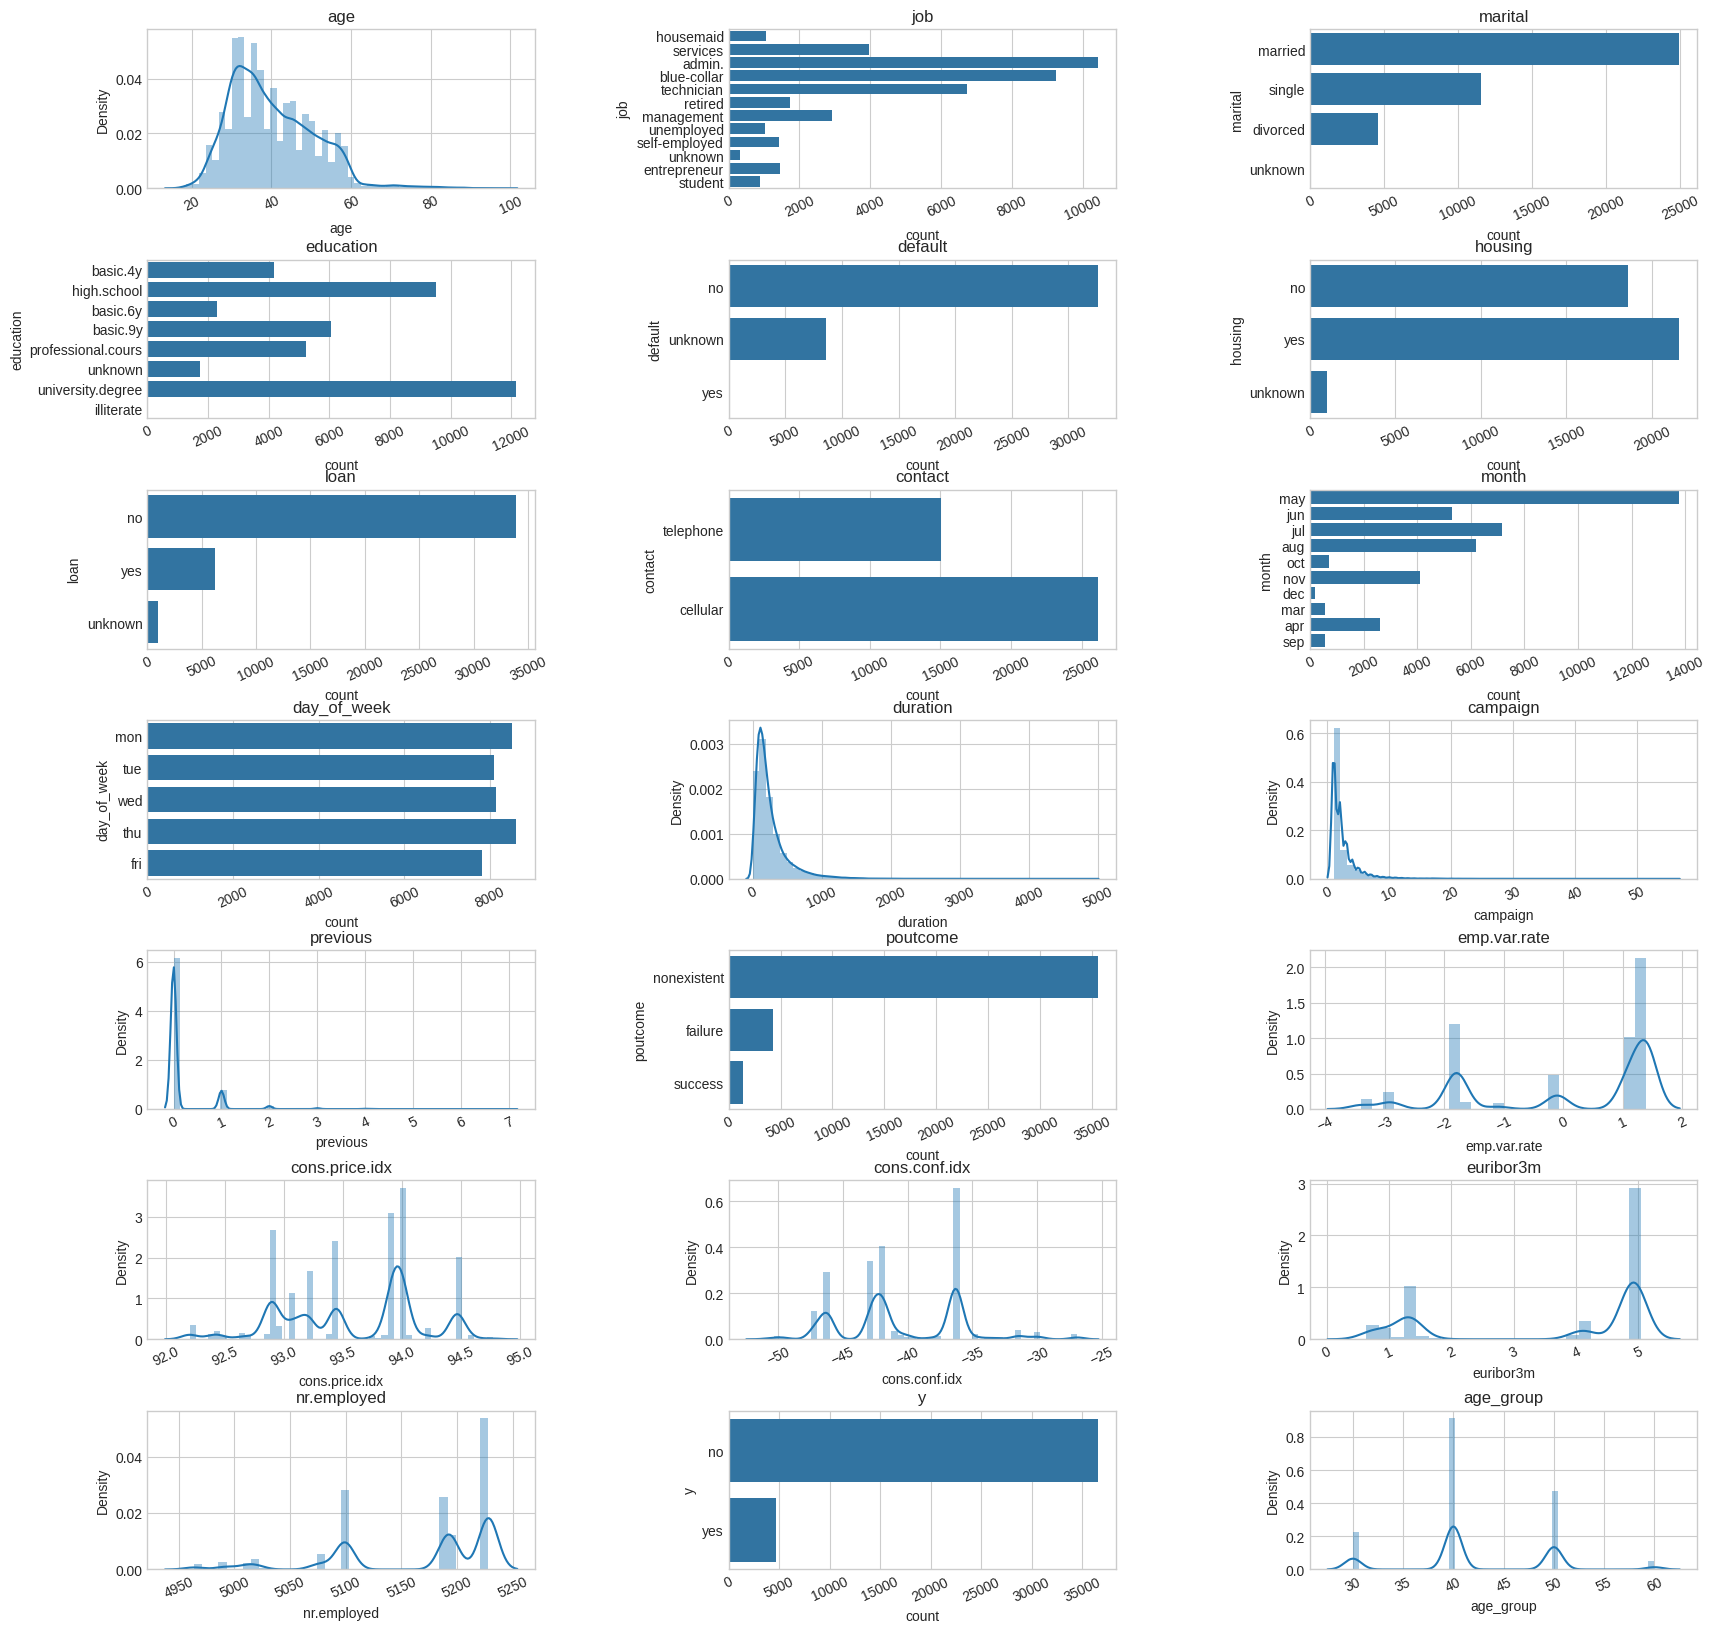

In [ ]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            try:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
            except RuntimeError as re:
                if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
                    sns.distplot(dataset[column], kde_kws={'bw': 0.1})
                else:
                    raise re

plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [ ]:
def drawheatmap(df):
    matrix = data.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)

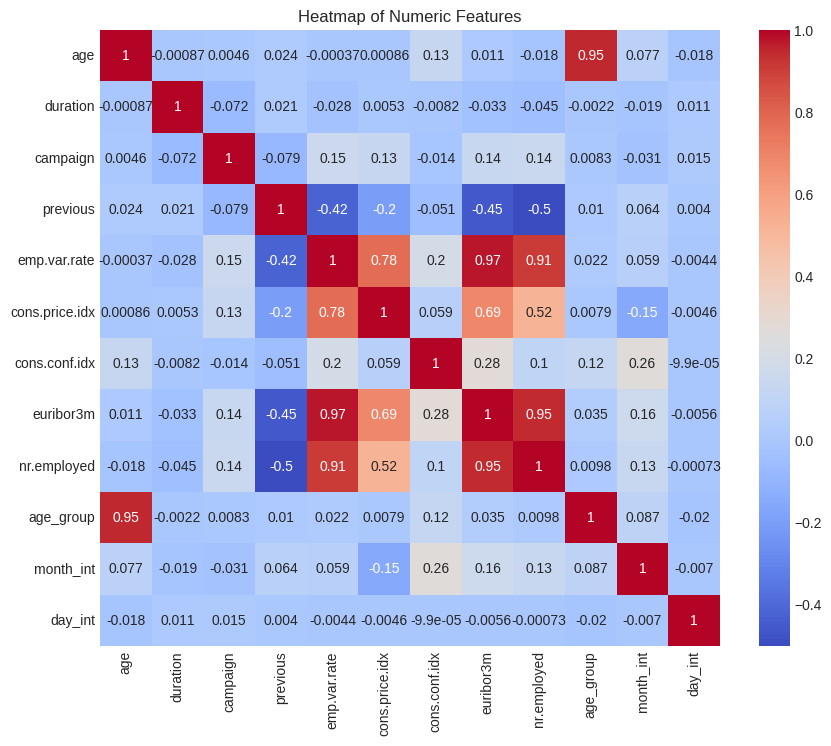

In [ ]:
def drawheatmap(data):
    # Drop non-numeric columns
    numeric_data = data.select_dtypes(include=[np.number])

    # If you want to retain categorical columns, use one-hot encoding instead
    # numeric_data = pd.get_dummies(data)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
    plt.title('Heatmap of Numeric Features')
    plt.show()

drawheatmap(data)

# MODELS

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sns
import missingno #find missing data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from scipy.stats import randint as sp_randint
import datetime


%matplotlib inline

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
#read data
data = pd.read_csv("/content/drive/My Drive/datasetML/bank-additional/bank-additional-full.csv",sep = ';')
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data = data.replace('unknown', np.nan)

In [ ]:
data.isna().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


<Axes: >

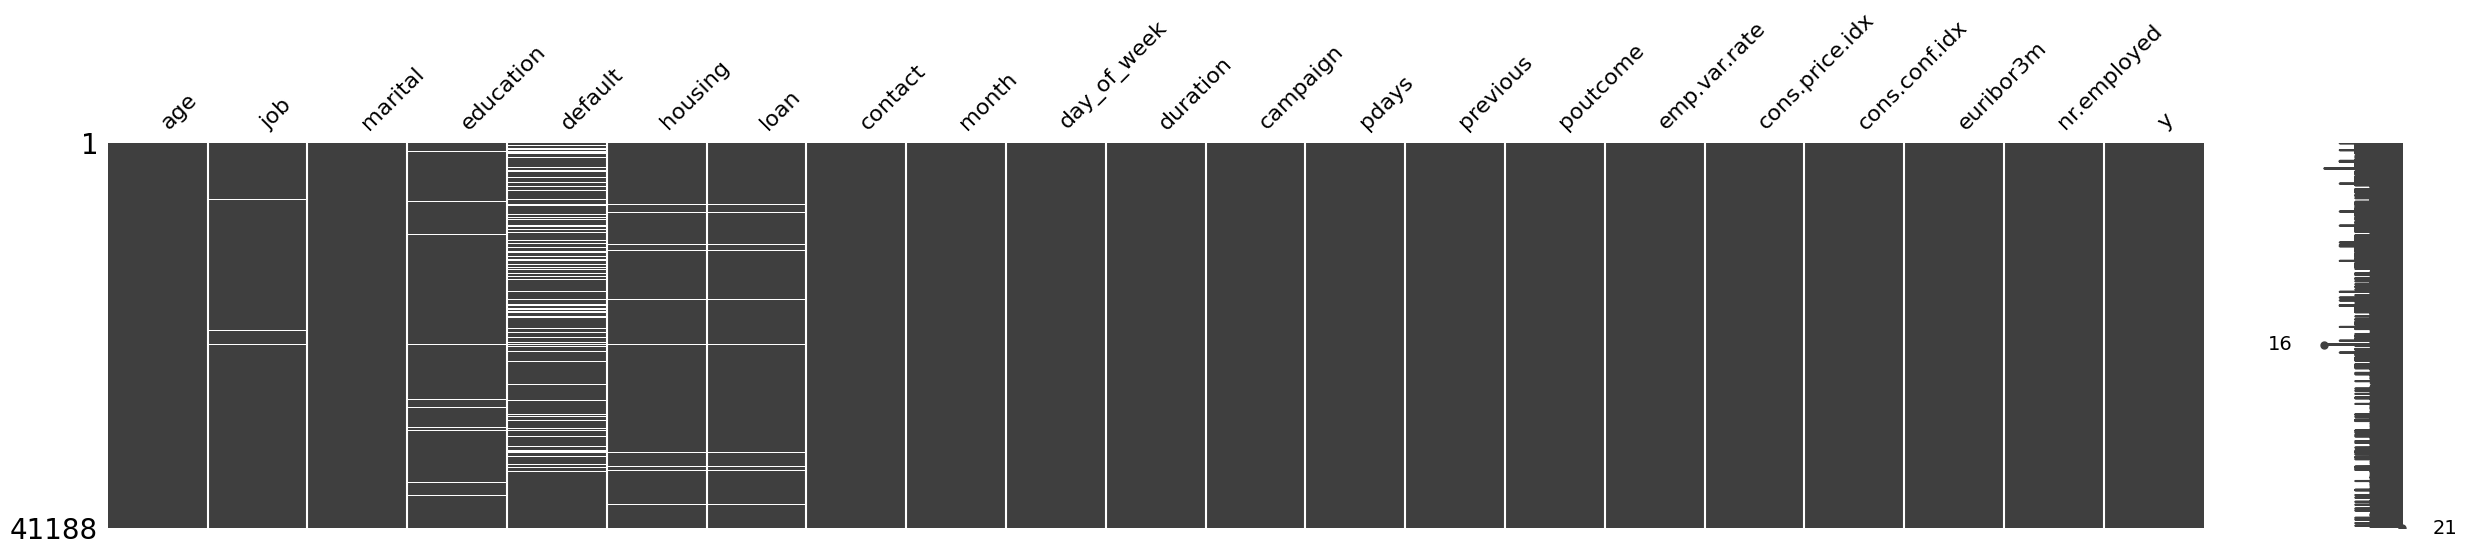

In [ ]:
# How many missing values are there in our dataset?

missingno.matrix(data, figsize = (30,5))

<Axes: >

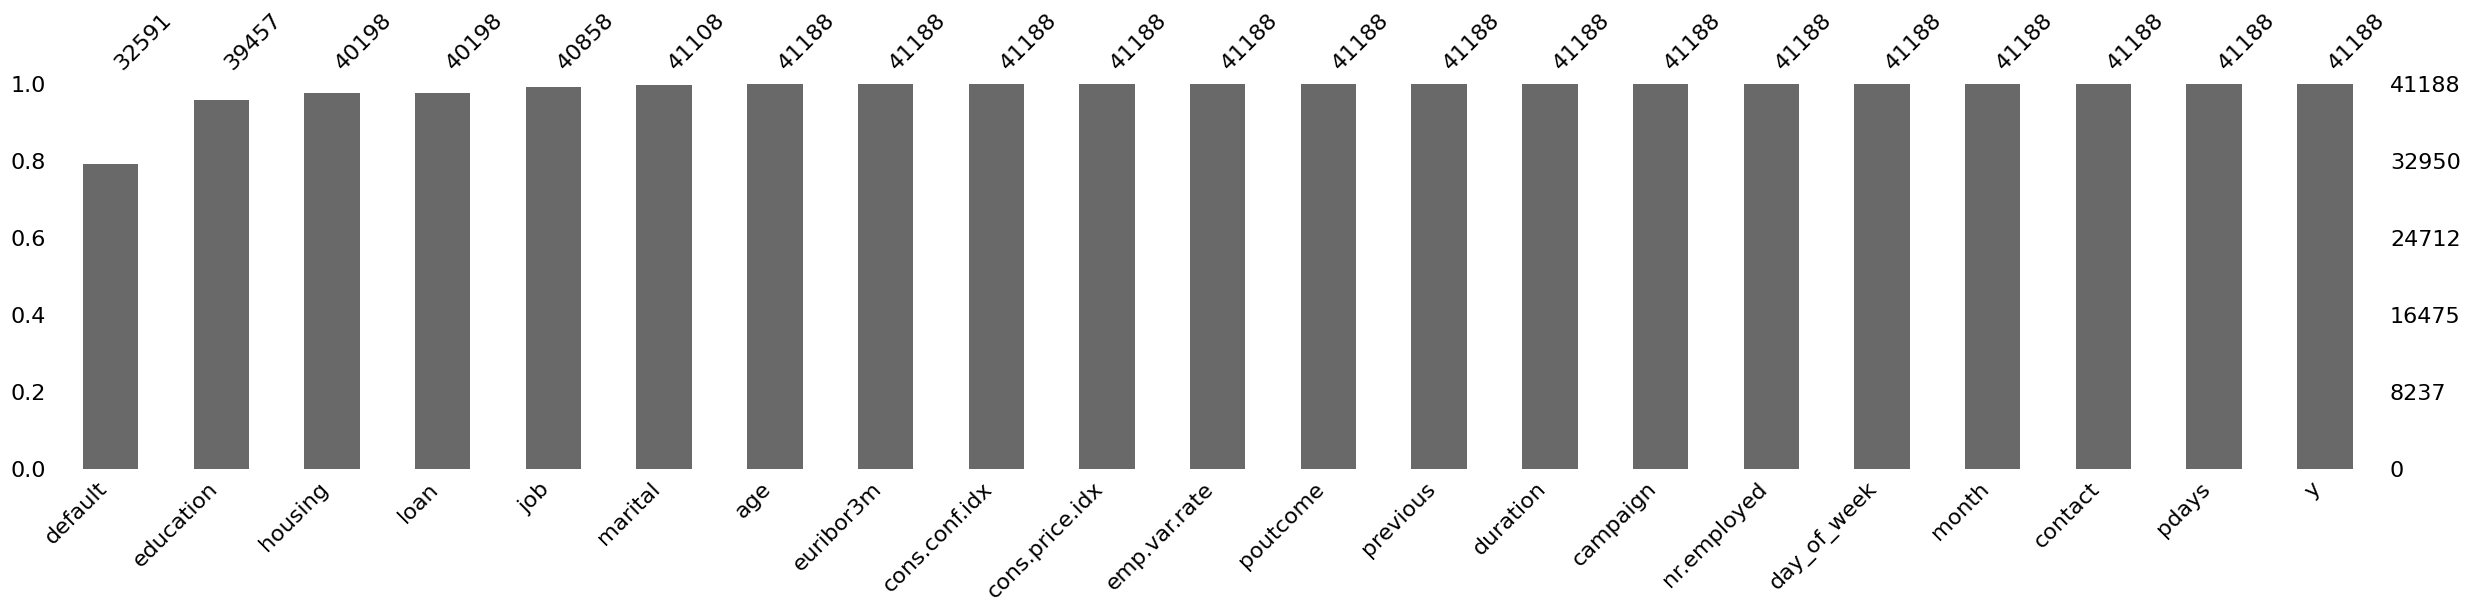

In [ ]:
missingno.bar(data, sort='ascending', figsize = (30,5))

In [ ]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data['default'] = data['default'].fillna(data['default'].mode()[0])

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data['y'].replace({"no":0, "yes":1}, inplace=True)

In [ ]:
Mean_encoded_job = data.groupby(['job'])['y'].mean().to_dict()
data['job'] =  data['job'].map(Mean_encoded_job)

Mean_encoded_marital = data.groupby(['marital'])['y'].mean().to_dict()
data['marital'] =  data['marital'].map(Mean_encoded_marital)

Mean_encoded_default = data.groupby(['default'])['y'].mean().to_dict()
data['default'] =  data['default'].map(Mean_encoded_default)

Mean_encoded_housing = data.groupby(['housing'])['y'].mean().to_dict()
data['housing'] =  data['housing'].map(Mean_encoded_housing)

Mean_encoded_loan = data.groupby(['loan'])['y'].mean().to_dict()
data['loan'] =  data['loan'].map(Mean_encoded_loan)

Mean_encoded_contact = data.groupby(['contact'])['y'].mean().to_dict()
data['contact'] =  data['contact'].map(Mean_encoded_contact)

Mean_encoded_month = data.groupby(['month'])['y'].mean().to_dict()
data['month'] =  data['month'].map(Mean_encoded_month)

Mean_encoded_poutcome = data.groupby(['poutcome'])['y'].mean().to_dict()
data['poutcome'] =  data['poutcome'].map(Mean_encoded_poutcome)

Mean_encoded_day_of_week = data.groupby(['day_of_week'])['y'].mean().to_dict()
data['day_of_week'] =  data['day_of_week'].map(Mean_encoded_day_of_week)

Mean_encoded_education = data.groupby(['education'])['y'].mean().to_dict()
data['education'] =  data['education'].map(Mean_encoded_education)

In [ ]:
#data_drop
data_drop = pd.DataFrame()
data_drop = data

In [ ]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: >

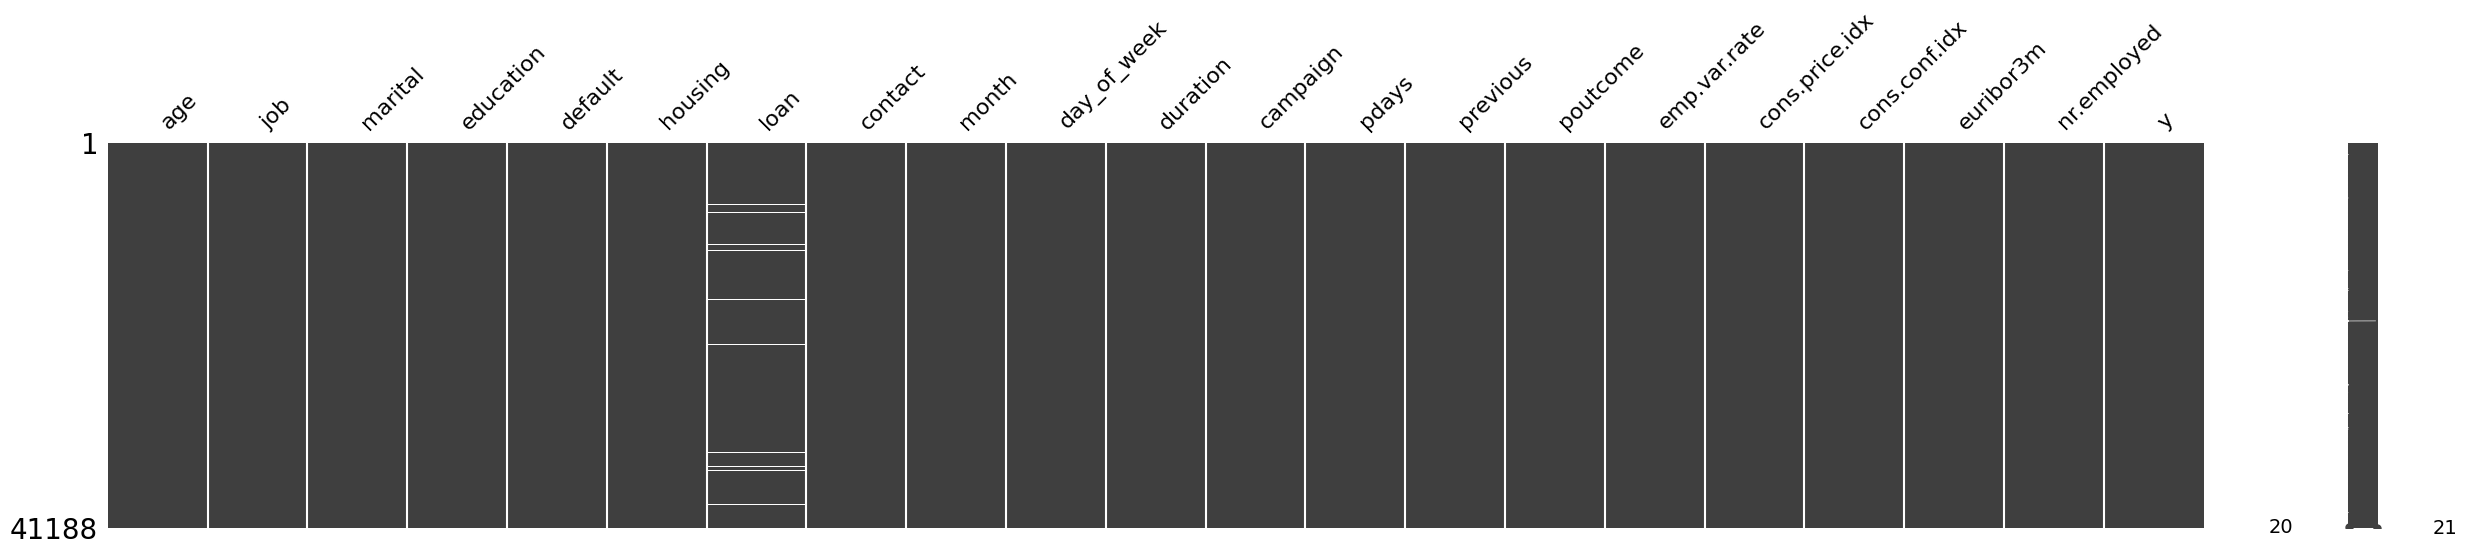

In [ ]:
missingno.matrix(data_drop, figsize = (30,5))

In [ ]:
data_drop.fillna(data_drop.mean(), inplace = True)

In [ ]:
data_drop.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.100000,0.101727,0.102490,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081381,0.101727,0.108355,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081381,0.101727,0.108355,0.112662,0.115838,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129185,0.101727,0.082024,0.112662,0.108796,0.113402,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081381,0.101727,0.108355,0.112662,0.108796,0.109315,0.052313,0.064347,0.099483,...,1,999,0,0.088322,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

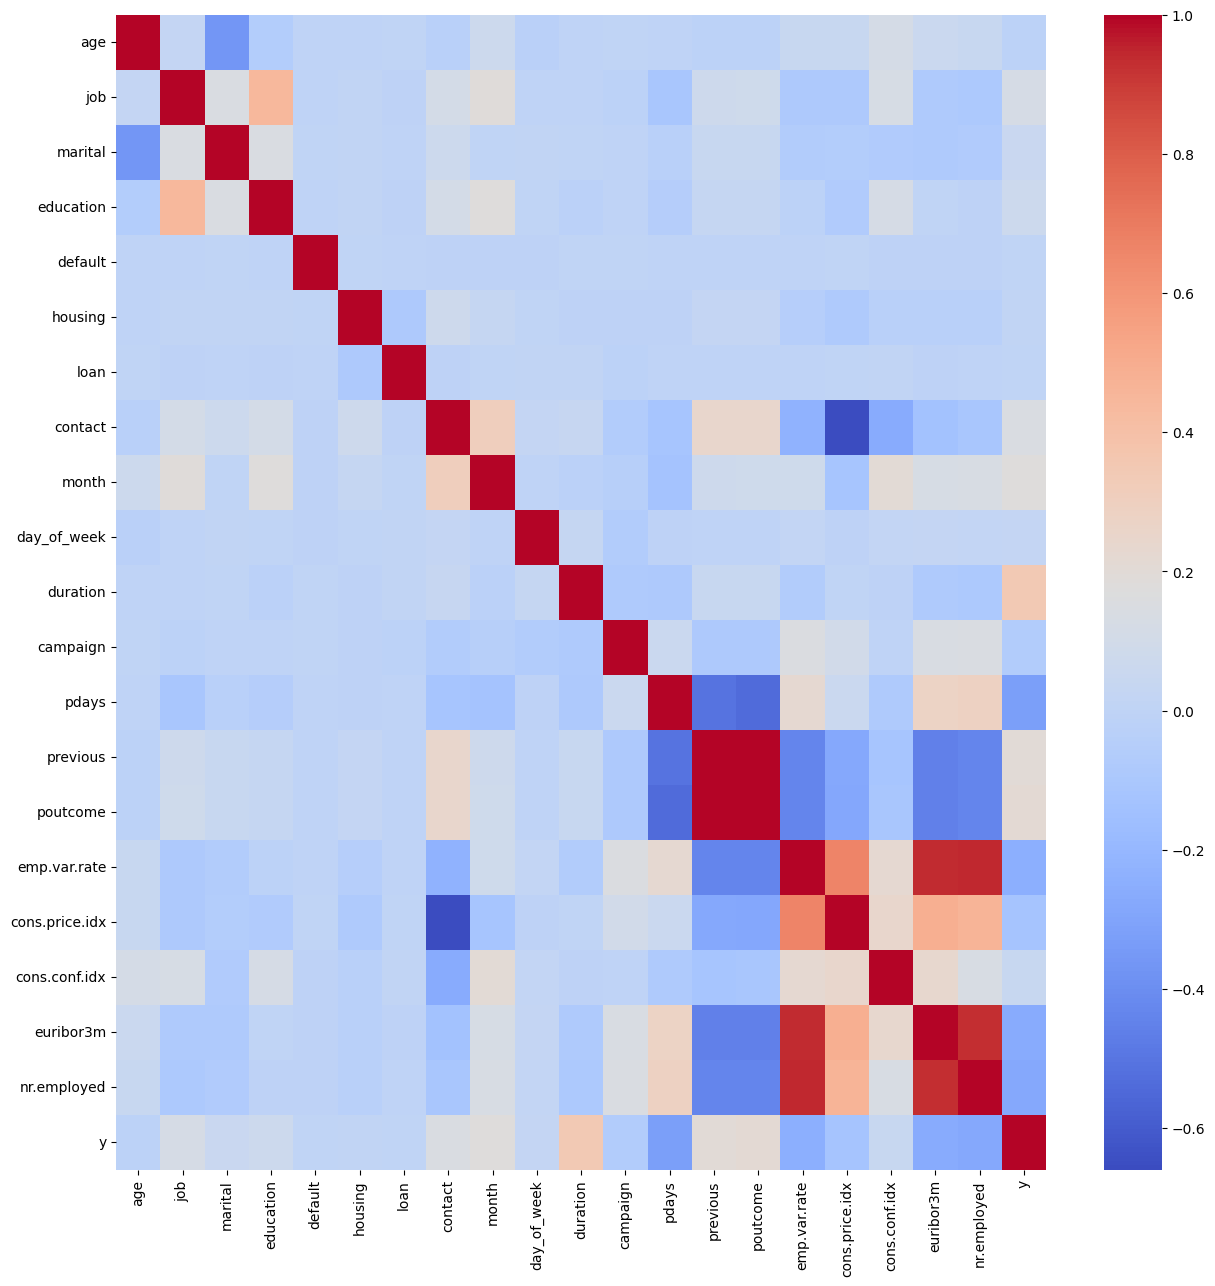

In [ ]:
drawheatmap(data_drop)

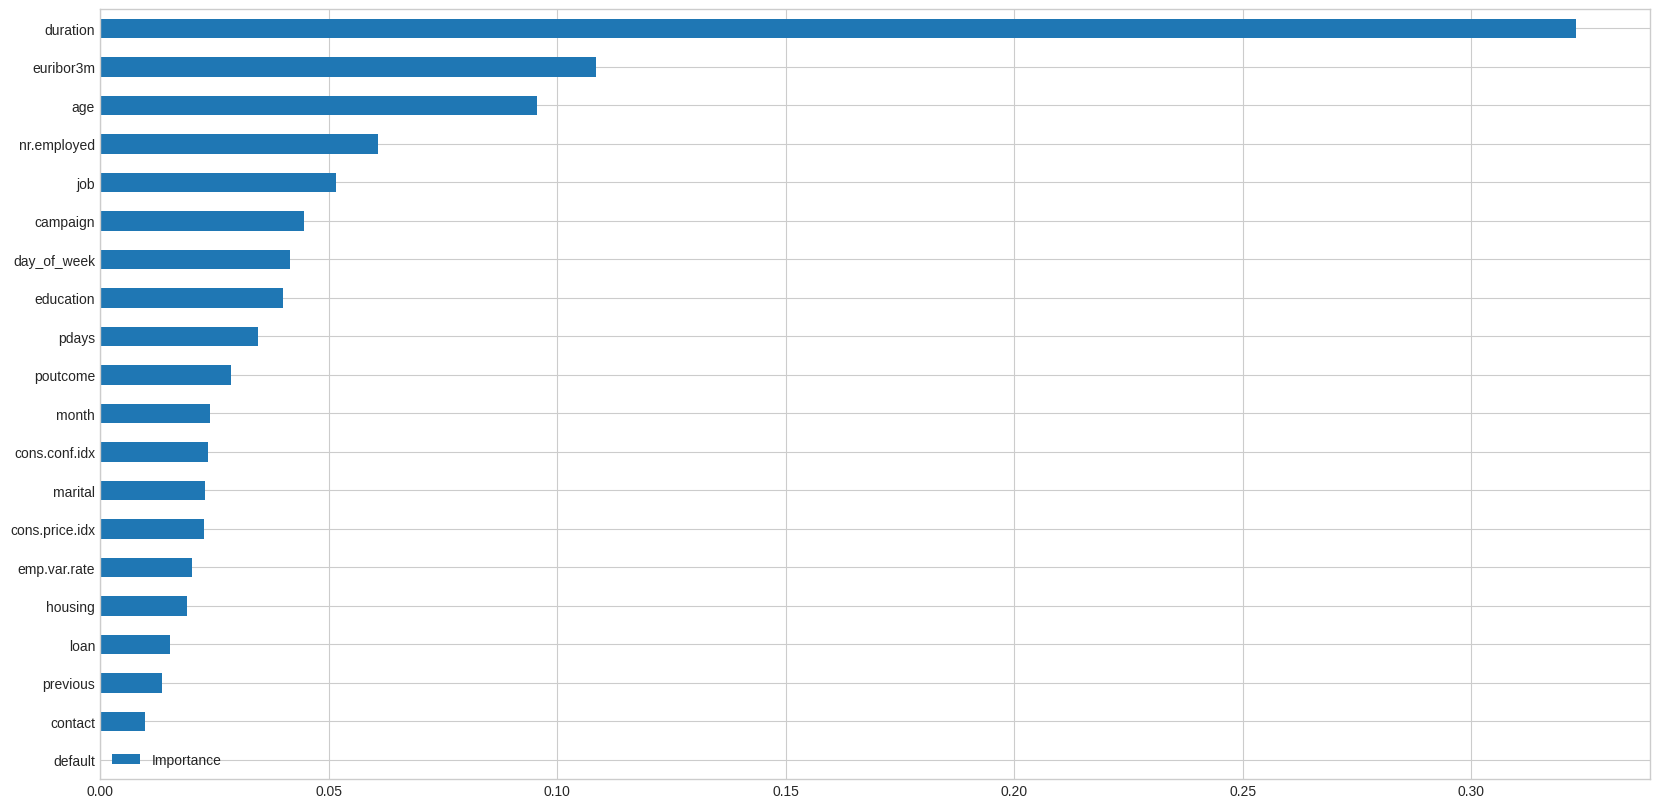

In [ ]:
# Using Random Forest to gain an insight on Feature Importance

clf = RandomForestClassifier()
clf.fit(data_drop.drop('y', axis=1), data_drop['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data_drop.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

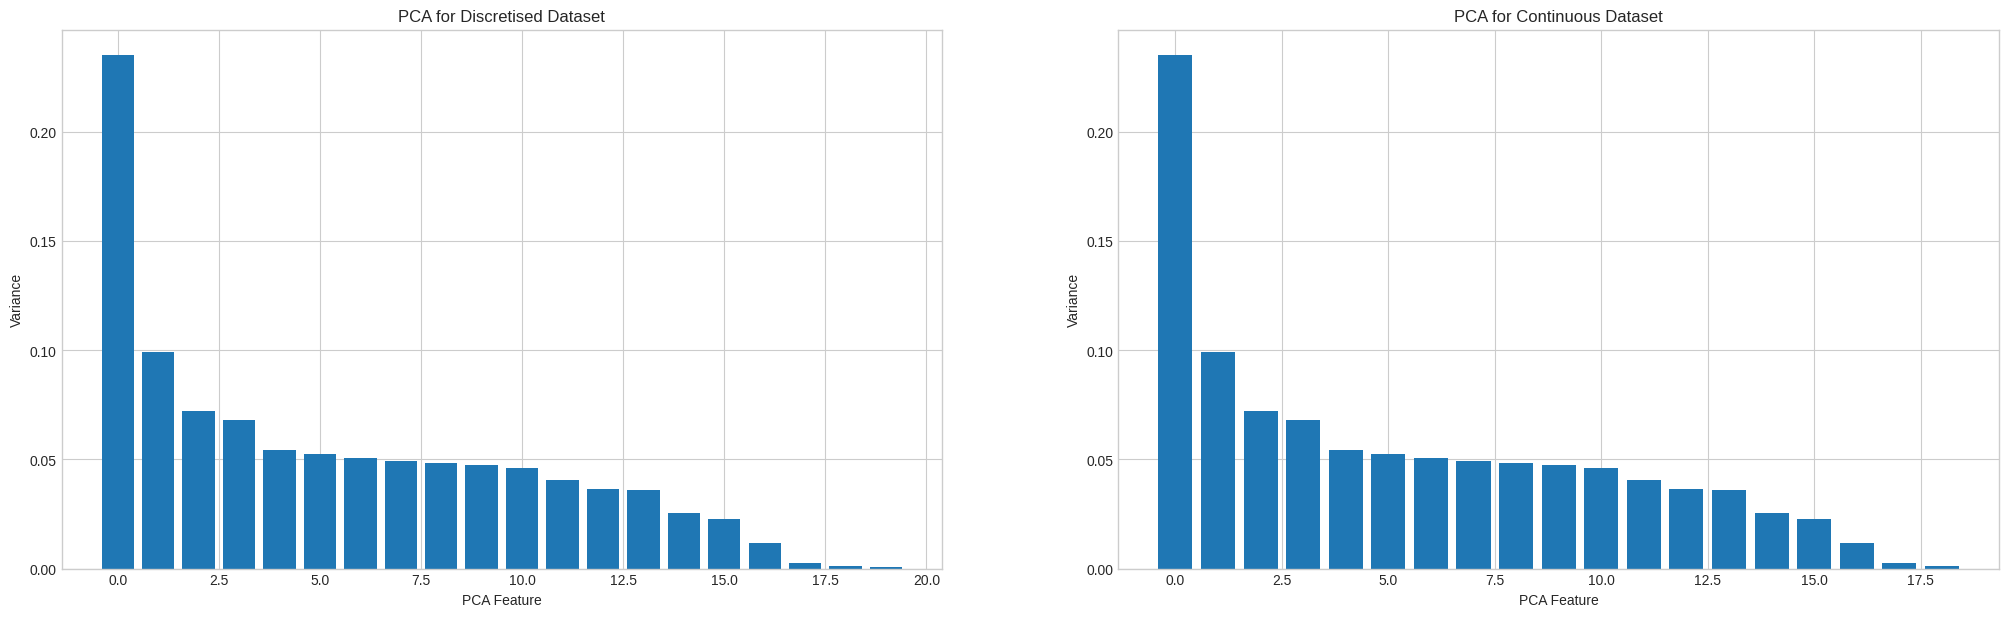

In [ ]:
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca1 = PCA(n_components=len(data_drop.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
pca2 = PCA(n_components=len(data_drop.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

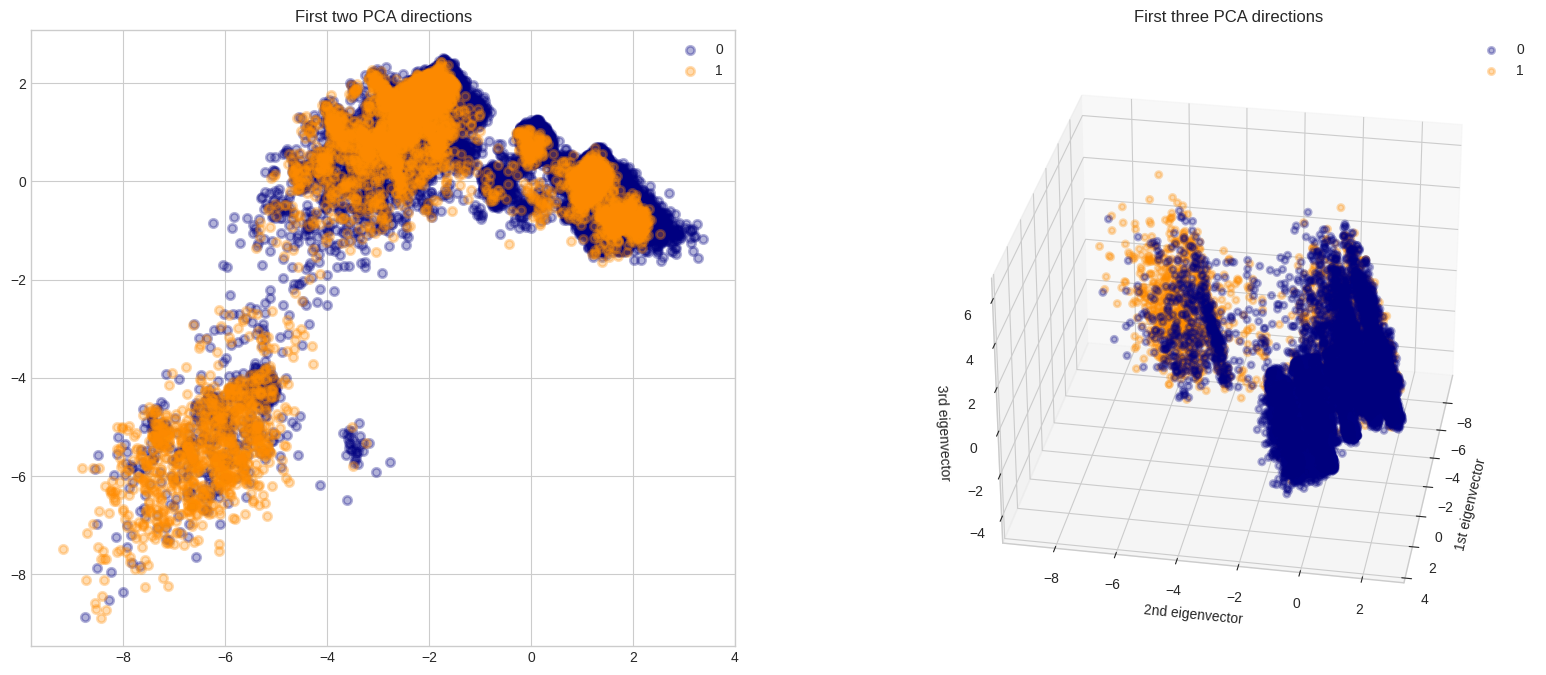

In [ ]:
# PCA's components graphed in 2D and 3D
# Apply Scaling
std_scale = preprocessing.StandardScaler().fit(data_drop.drop('y', axis=1))
X = std_scale.transform(data_drop.drop('y', axis=1))
y = data_drop['y']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1],
                color=color,
                alpha=alpha,
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
               color=color,
               alpha=alpha,
               lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

Optimal number of features : 4


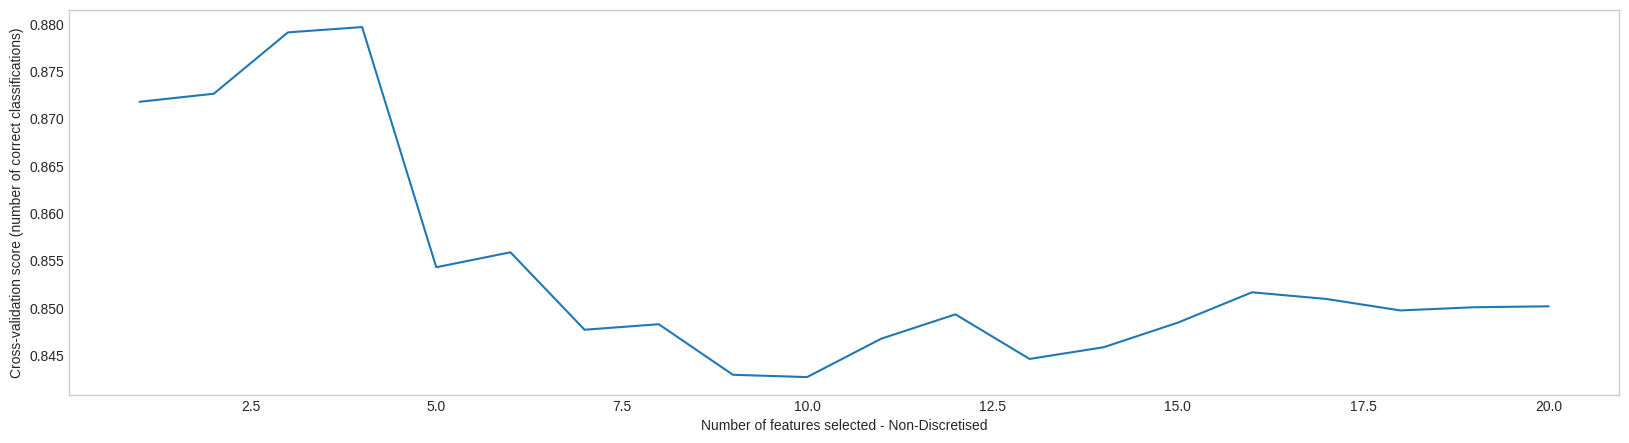

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Calculating RFE for non-discretised dataset and graphing the importance for each feature
selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1.fit(data_drop.drop('y', axis=1).values, data_drop['y'].values)

print("Optimal number of features : %d" % selector1.n_features_)

# Plot number of features vs. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross-validation score (number of correct classifications)")

# Use selector1.grid_scores_ if you have an older version of sklearn or selector1.cv_results_ if you have a newer version
if hasattr(selector1, 'grid_scores_'):
    plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_)
elif hasattr(selector1, 'cv_results_'):
    plt.plot(range(1, len(selector1.cv_results_['mean_test_score']) + 1), selector1.cv_results_['mean_test_score'])
else:
    raise AttributeError("No available attribute for cross-validation scores")

plt.grid()
plt.show()

# Feature space could be subsetted like so:
data_drop = data_drop[data_drop.columns[np.insert(selector1.support_, 0, True)]]

In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from numpy import ravel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train1, y_train1.values.ravel())

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (58508, 20)
X Test: (8238, 20)
Y Train: (58508,)
Y Test: (8238,)


In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression,
                          KNeighborsClassifier,
                          RandomForestClassifier,
                          ))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2)
    # CV
    train_pred = model_selection.cross_val_predict(algo,
                                                  X_train,
                                                  y_train,
                                                  cv=cv,
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000),
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,
                                   n_jobs=-1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 2.92 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.880 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.826106711393907e-05, 'class_weight': 'balanced', 'C': 420206093809853.4}

Model with rank: 2
Mean validation score: 0.880 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.02545895562293349, 'class_weight': None, 'C': 0.06454773213994643}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.0478570271353232e-17, 'class_weight': None, 'C': 5439682569485943.0}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 70873.69062820199, 'class_weight': 'balanced', 'C': 4521322924321.553}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.3928822095535978e+19, 'class_weight': 'balanced', 'C': 0.20793700922086958}

Model wi

In [ ]:
# Logistic Regression

start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1),
                                                                 X_train,
                                                                 y_train,
                                                                 X_test,
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 86.32
Accuracy CV 10-Fold: 88.04
Running Time: 0:00:02.171344


In [ ]:
from sklearn.metrics import classification_report
print (metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     29254
           1       0.87      0.90      0.88     29254

    accuracy                           0.88     58508
   macro avg       0.88      0.88      0.88     58508
weighted avg       0.88      0.88      0.88     58508



In [ ]:
print (metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7294
           1       0.45      0.86      0.59       944

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



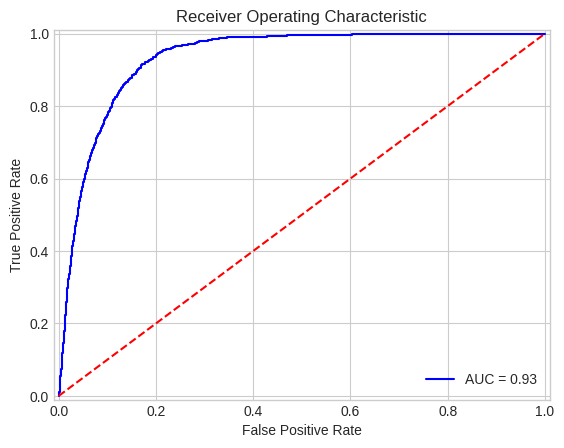

In [ ]:
plot_roc_curve(y_test, probs_log)

AUC for k =  1 is 0.8223822371998346
AUC for k =  8 is 0.9060722360612158
AUC for k =  15 is 0.9177842509283229
AUC for k =  22 is 0.9217508266604081
AUC for k =  29 is 0.9230633606446905
AUC for k =  36 is 0.9253045805003416
AUC for k =  43 is 0.9263376881625484
AUC for k =  50 is 0.9275583629219281
AUC for k =  57 is 0.9276208126716642
AUC for k =  64 is 0.9274617836578009


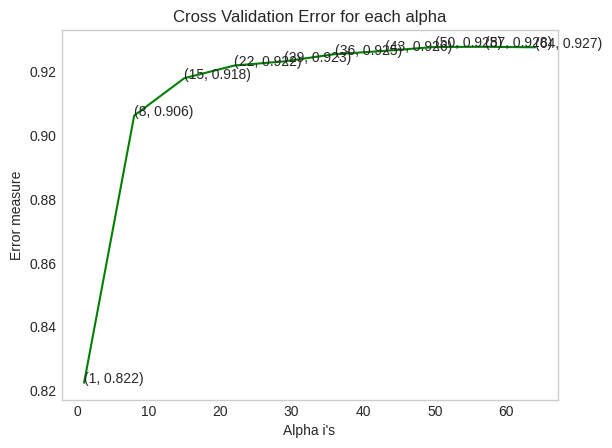

For values of best alpha =  57 The train AUC is: 0.9523113161400156
For values of best alpha =  57 The test AUC is: 0.9276208126716642


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
%matplotlib inline

alpha = [x for x in range(1, 70, 7)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    cv_auc_array.append(roc_auc_score(y_test, predict_y[:,1]))
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])
best_alpha = np.argmax(cv_auc_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

In [ ]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors=alpha[best_alpha],
                                                                                                   n_jobs = -1),
                                                                                                 X_train,
                                                                                                 y_train,
                                                                                                 X_test,
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.55
Accuracy CV 10-Fold: 89.23
Running Time: 0:00:31.735716


In [ ]:
print (metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     29254
           1       0.85      0.95      0.90     29254

    accuracy                           0.89     58508
   macro avg       0.90      0.89      0.89     58508
weighted avg       0.90      0.89      0.89     58508



In [ ]:
print (metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7294
           1       0.40      0.90      0.56       944

    accuracy                           0.84      8238
   macro avg       0.69      0.86      0.73      8238
weighted avg       0.92      0.84      0.86      8238



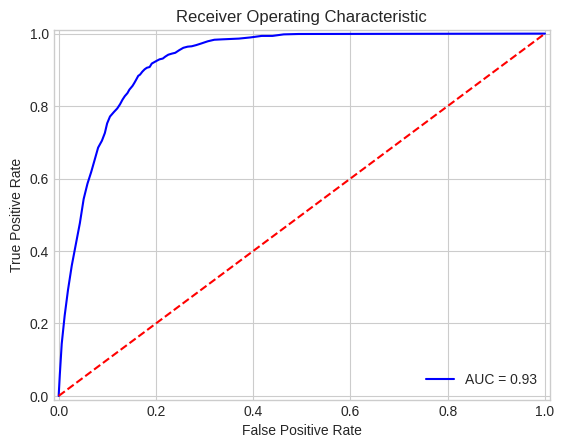

In [ ]:
plot_roc_curve(y_test, probs_knn)

In [ ]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,
                                   n_jobs = -1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 40.05 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.941 (std: 0.031)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 28}

Model with rank: 2
Mean validation score: 0.937 (std: 0.019)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 15}

Model with rank: 3
Mean validation score: 0.936 (std: 0.029)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 15}

Model with rank: 4
Mean validation score: 0.934 (std: 0.019)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 13}

Model with rank: 5
Mean validation score: 0.933 (std: 0.017)
Parameters: {'bootstrap': True, 'criterion': 'gini

In [ ]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10,
                             min_samples_leaf=2,
                             min_samples_split=17,
                             criterion='gini',
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc,
                                                             X_train,
                                                             y_train,
                                                             X_test,
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 89.94
Accuracy CV 10-Fold: 94.02
Running Time: 0:00:17.664099


In [ ]:
print (metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     29254
           1       0.92      0.96      0.94     29254

    accuracy                           0.94     58508
   macro avg       0.94      0.94      0.94     58508
weighted avg       0.94      0.94      0.94     58508



In [ ]:
print (metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7294
           1       0.54      0.76      0.63       944

    accuracy                           0.90      8238
   macro avg       0.76      0.84      0.79      8238
weighted avg       0.92      0.90      0.91      8238



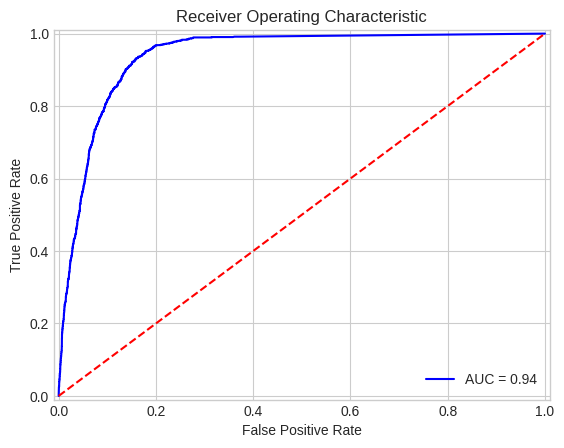

In [ ]:
plot_roc_curve(y_test, probs_rf)

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest'],
    'Score': [
        acc_knn,
        acc_log,
        acc_rf
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,89.94
1,Logistic Regression,86.32
0,KNN,83.55


In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest'],
    'Score': [
        acc_cv_knn,
        acc_cv_log,
        acc_cv_rf
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,94.02
0,KNN,89.23
1,Logistic Regression,88.04


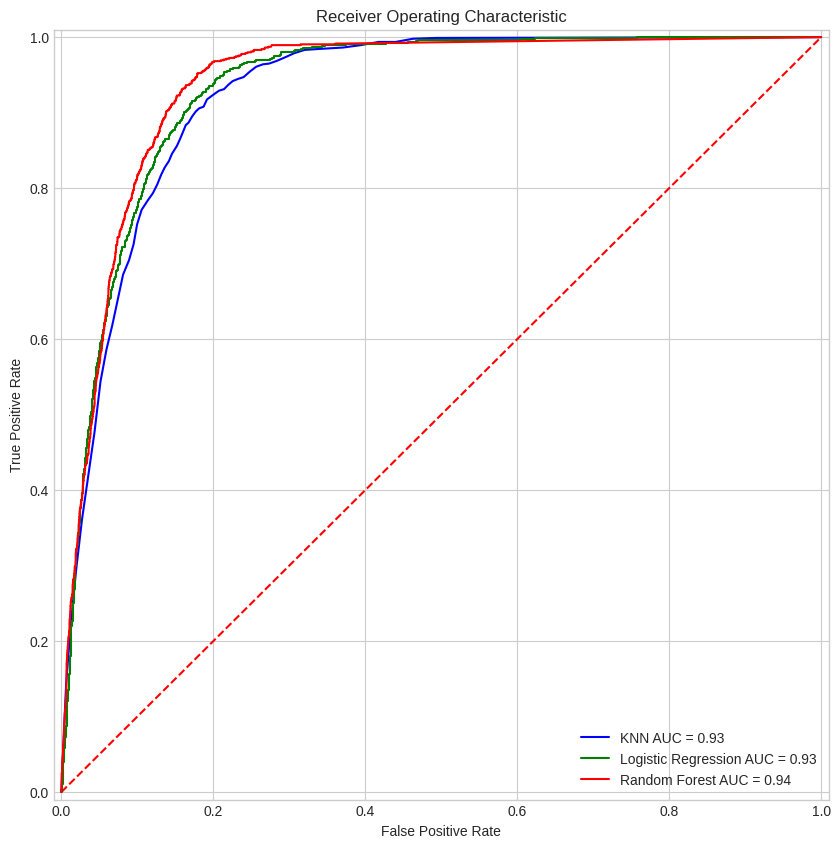

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

models = [
    'KNN',
    'Logistic Regression',
    'Random Forest'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf
]
colors = [
    'blue',
    'green',
    'red'
]

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')

for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])

plt.show()